In [90]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [91]:
filename = 'TIP.MI.csv'
df = read_csv(filename)
ticker = filename.replace('csv', '')

df.tail()


date  open  high   low  close  adj_close  volume
2115 2024-04-25  9.09  9.09  8.90   8.90       8.90  173876
2116 2024-04-26  8.99  9.10  8.95   9.06       9.06  128789
2117 2024-04-29  9.10  9.15  9.03   9.15       9.15  203098
2118 2024-04-30  9.19  9.24  9.12   9.12       9.12  161113
2119 2024-05-02  9.15  9.20  9.10   9.11       9.11   30250

In [92]:
# filename_bm = 'FTSE_MIB.xlsx'
# bm_df = read_xlsx(filename_bm)
# bm_name = filename_bm.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.csv'
bm_df = read_csv(filename_bm)
bm_name = filename_bm.replace('csv', '')

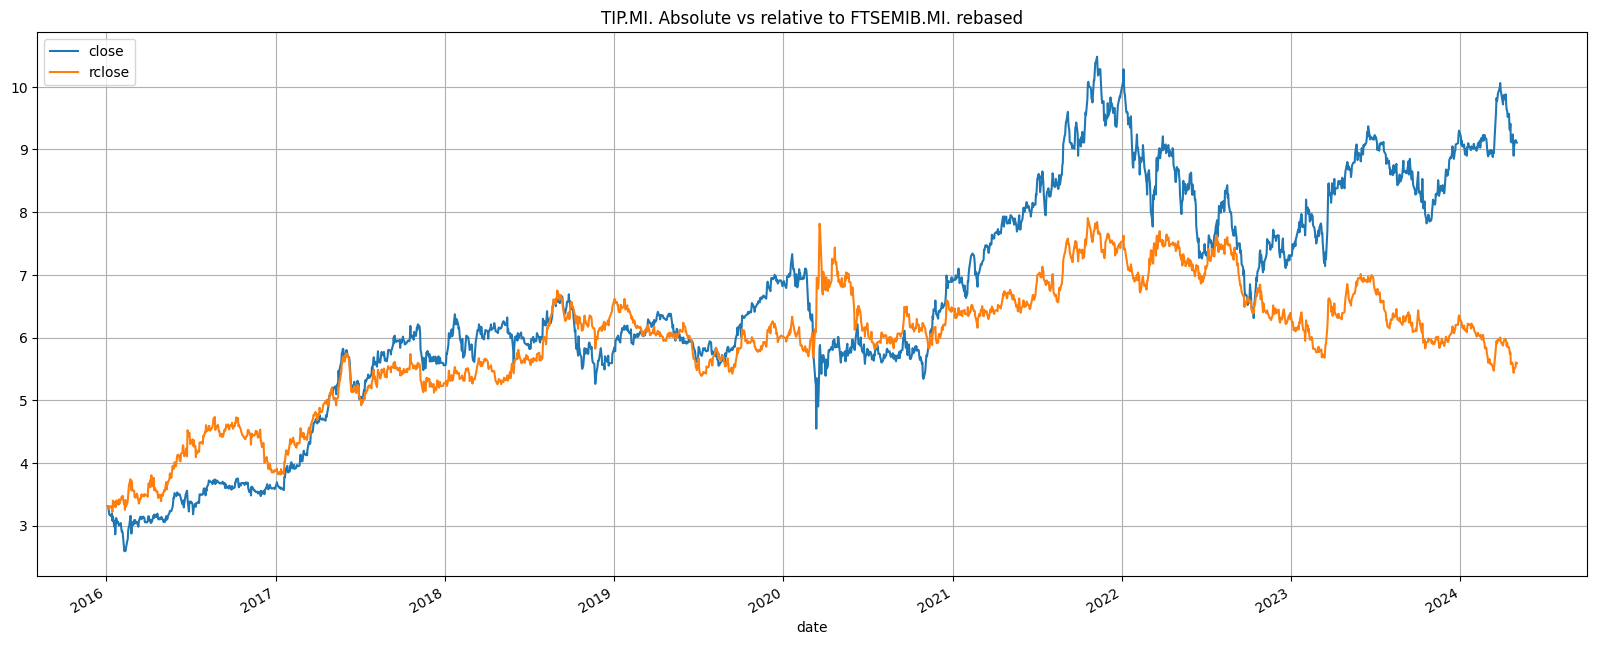

In [93]:
plot_abs_rel(df, ticker, bm_df, bm_name)

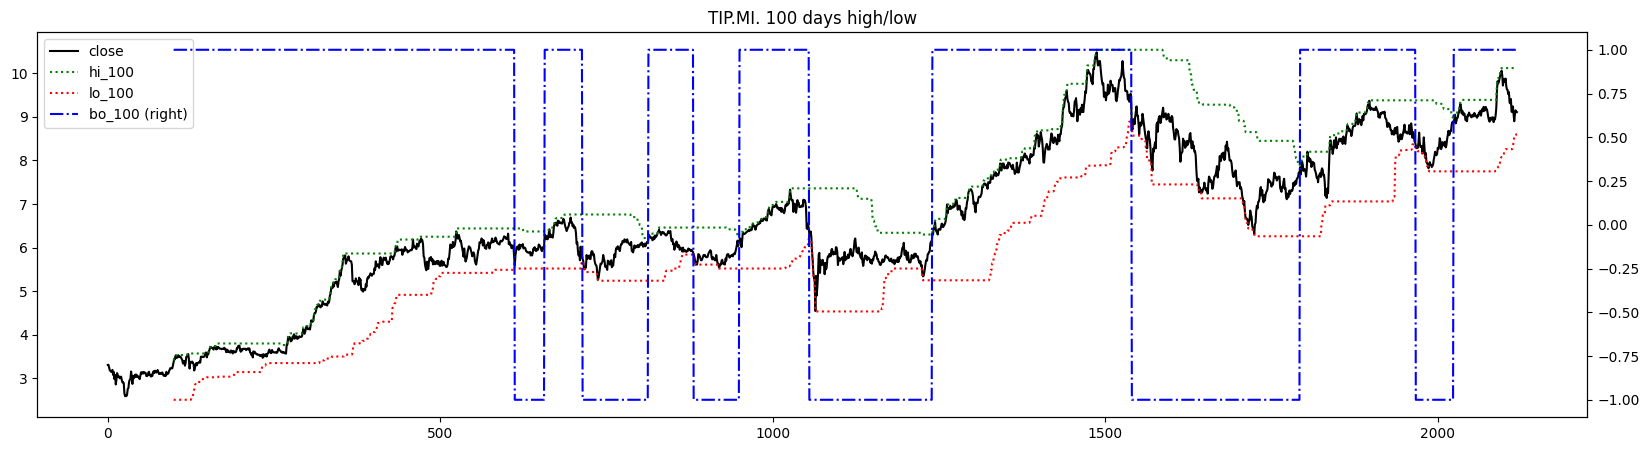

In [94]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

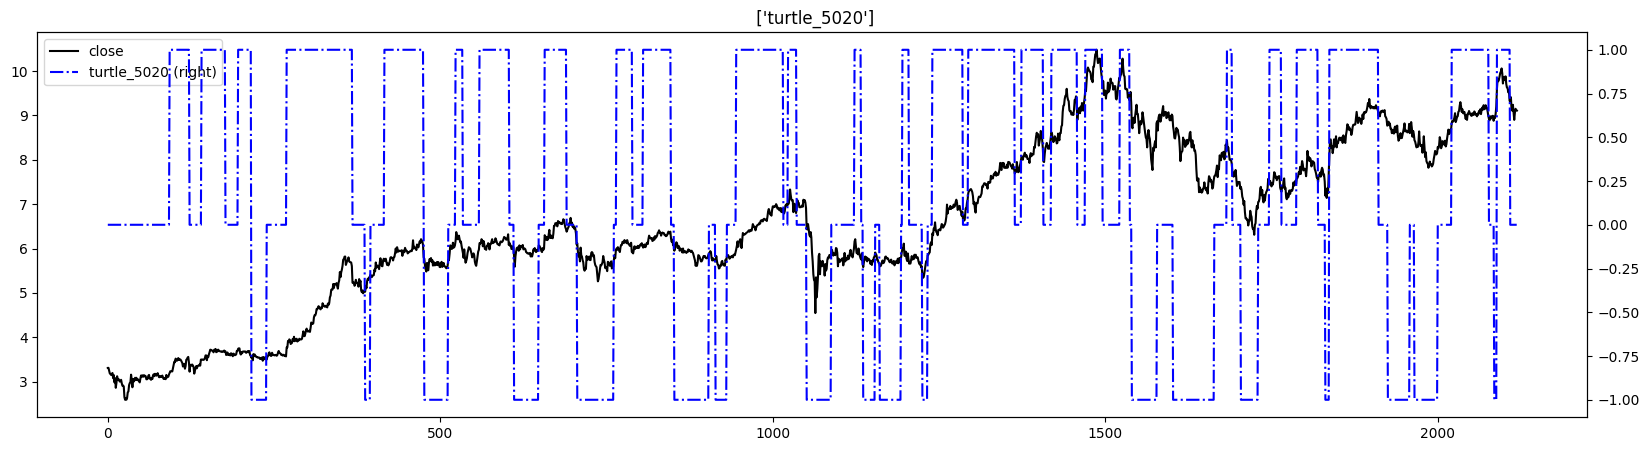

In [95]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

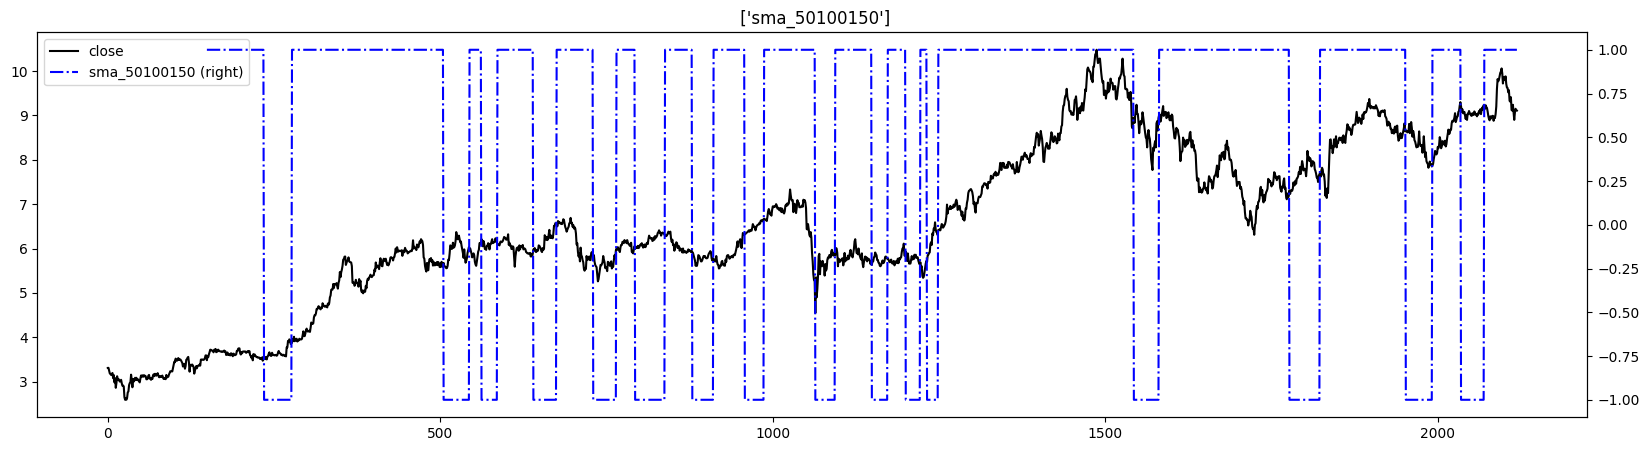

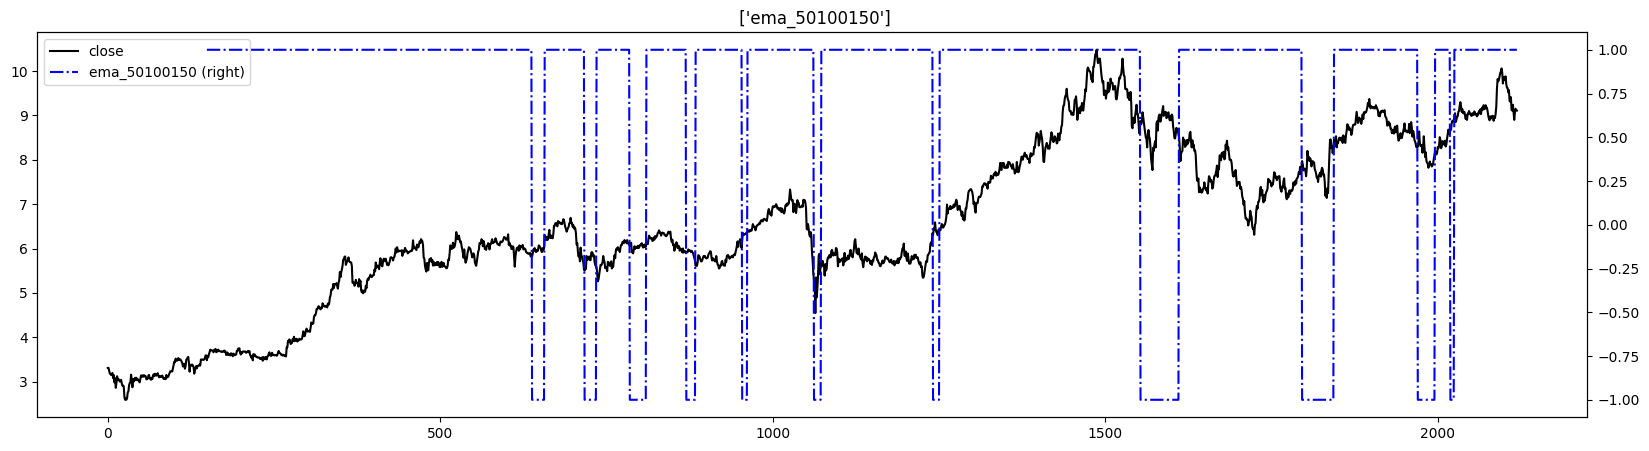

In [96]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

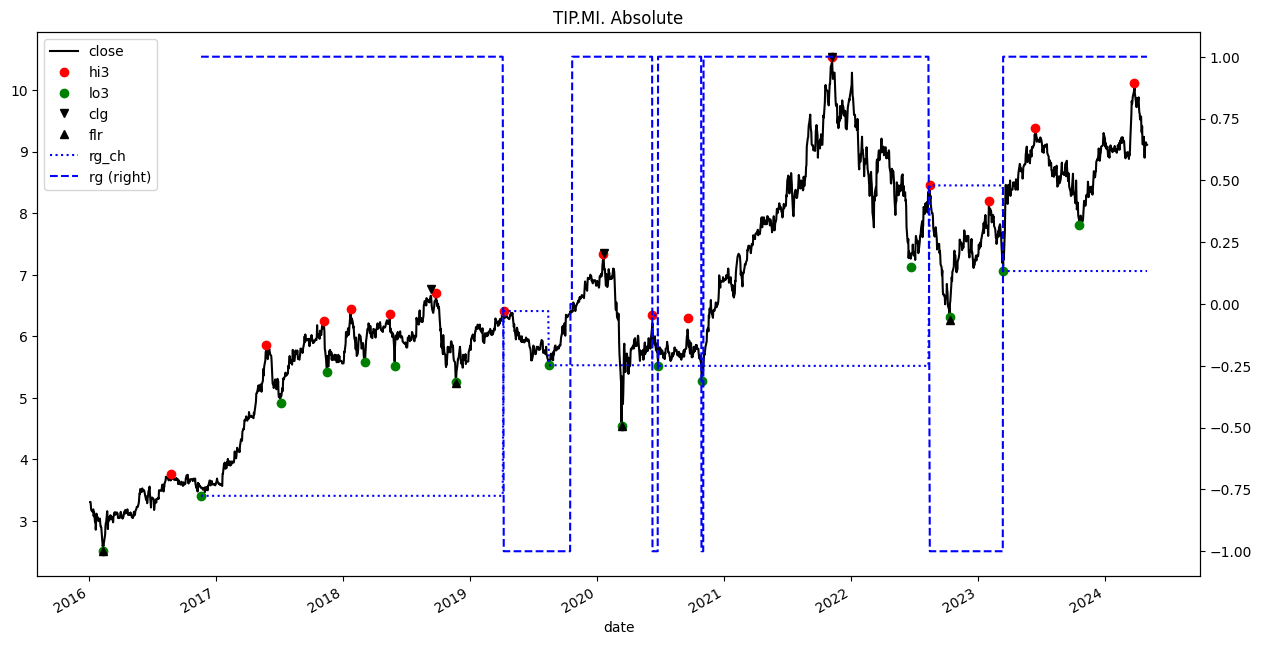

In [97]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


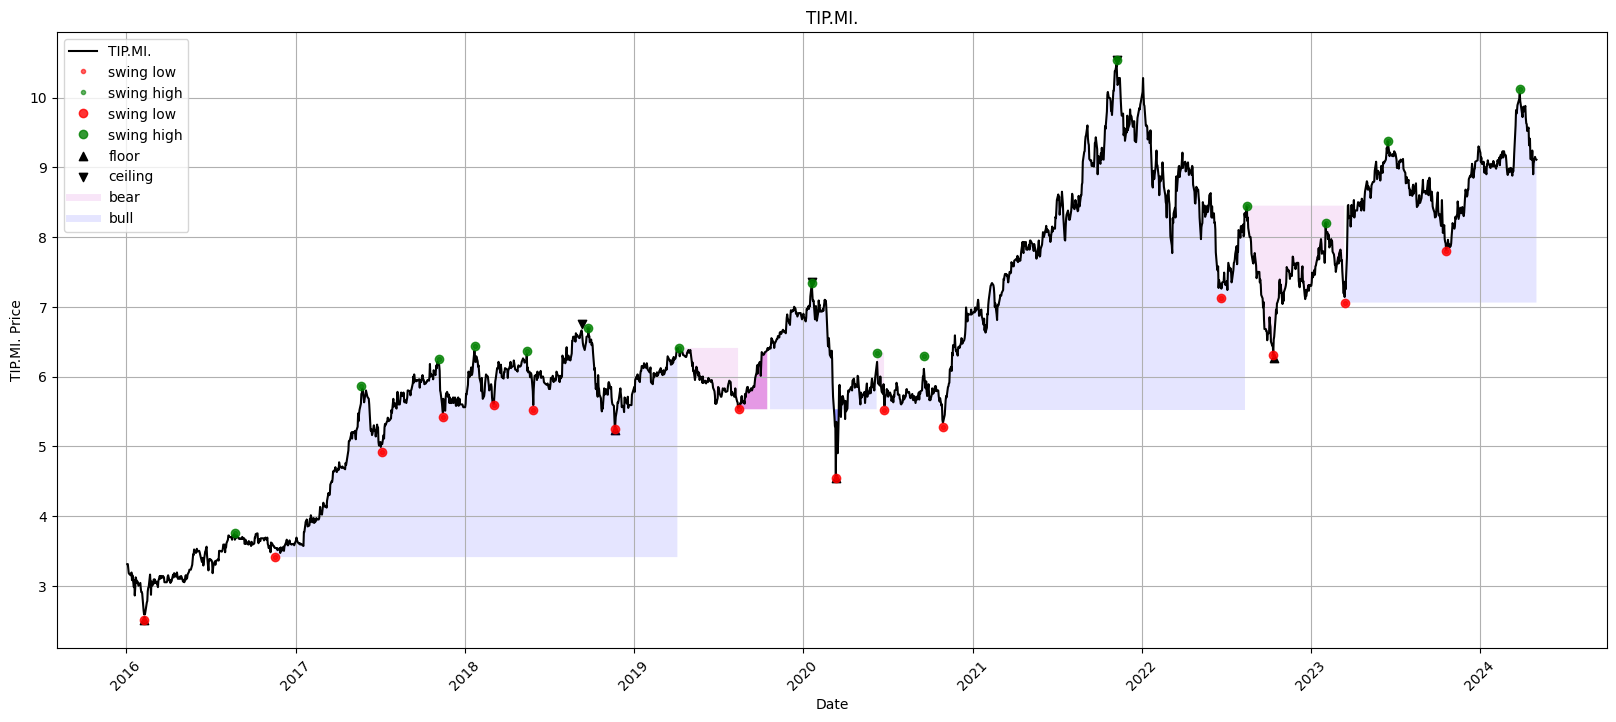

In [98]:
plot_regime_abs(df_fc, ticker)

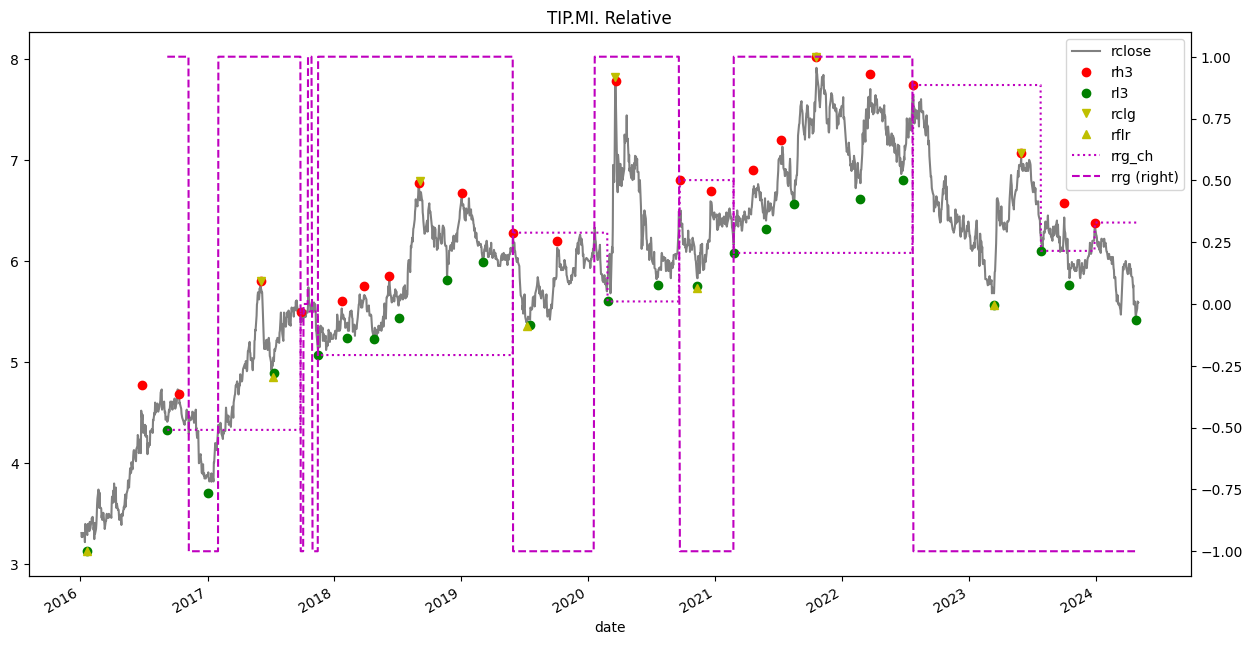

In [99]:
plot_signal_rel(df_fc, ticker)

1
1


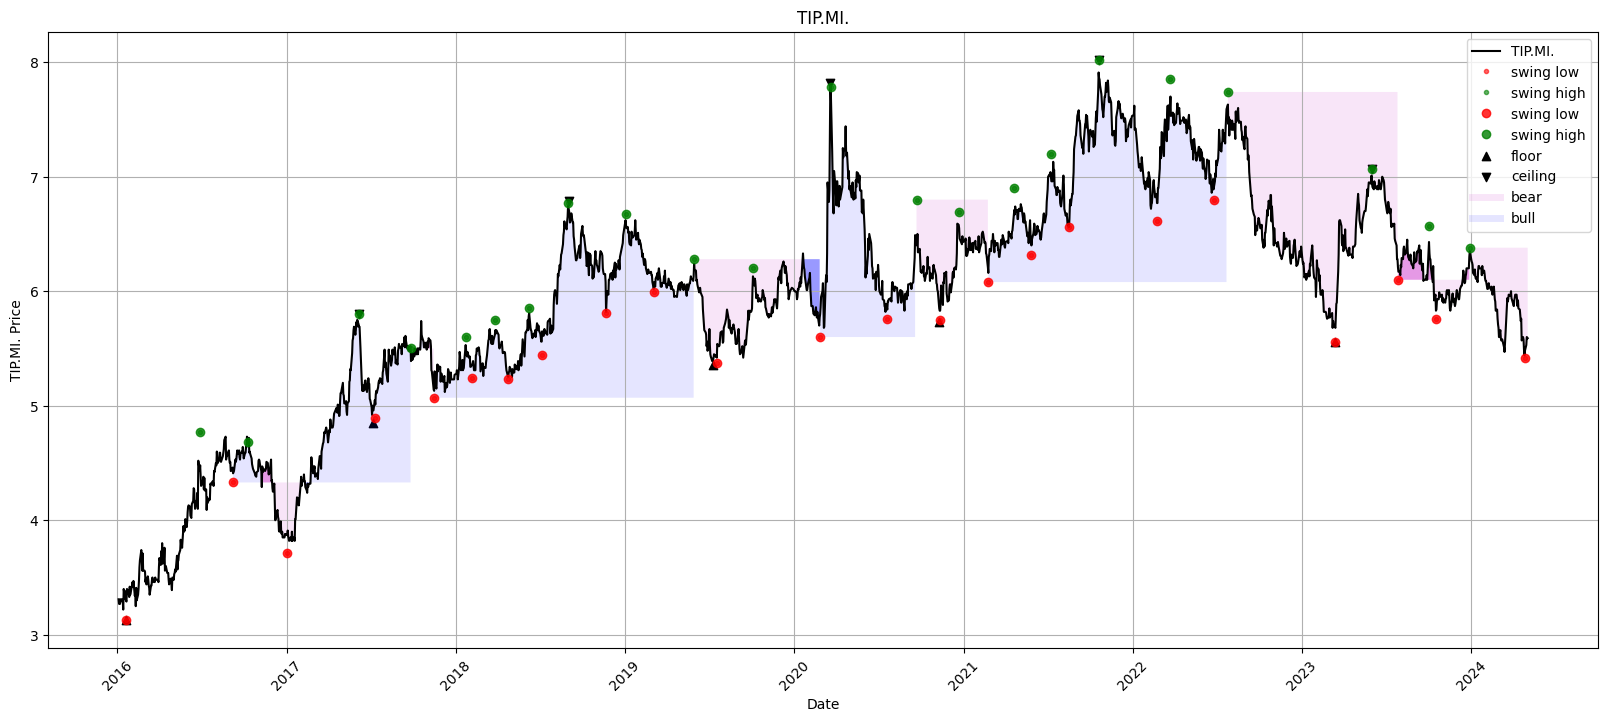

In [100]:
plot_regime_rel(df_fc, ticker)

In [101]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [102]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [103]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [104]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                 9.11       8.90  0.773212
ema                      9.11       8.90  0.763350
floor_ceiling            9.11       8.90  3.076224
floor_ceiling_relative   9.11       9.92 -0.190834
sma                      9.11       8.90 -0.286703
turtle                   9.11       9.20  0.273875

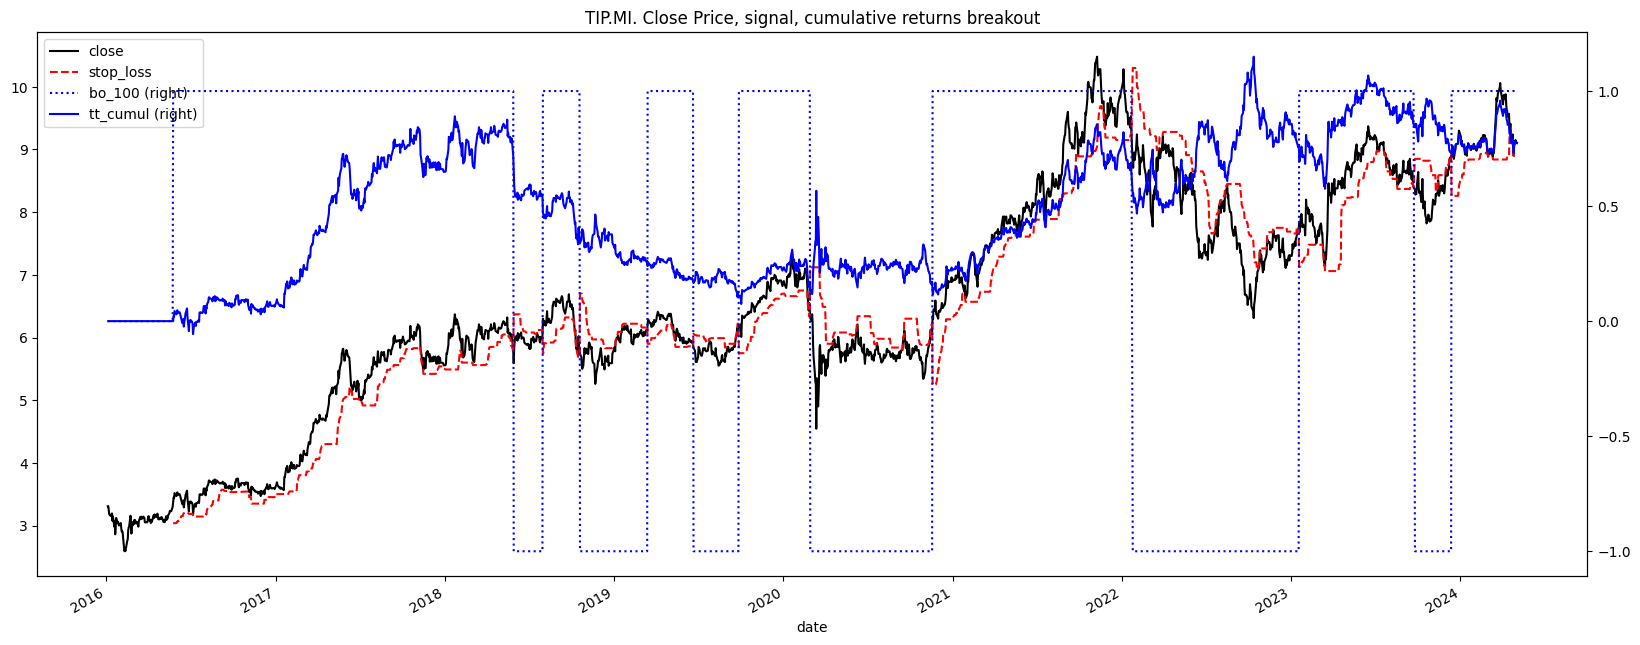

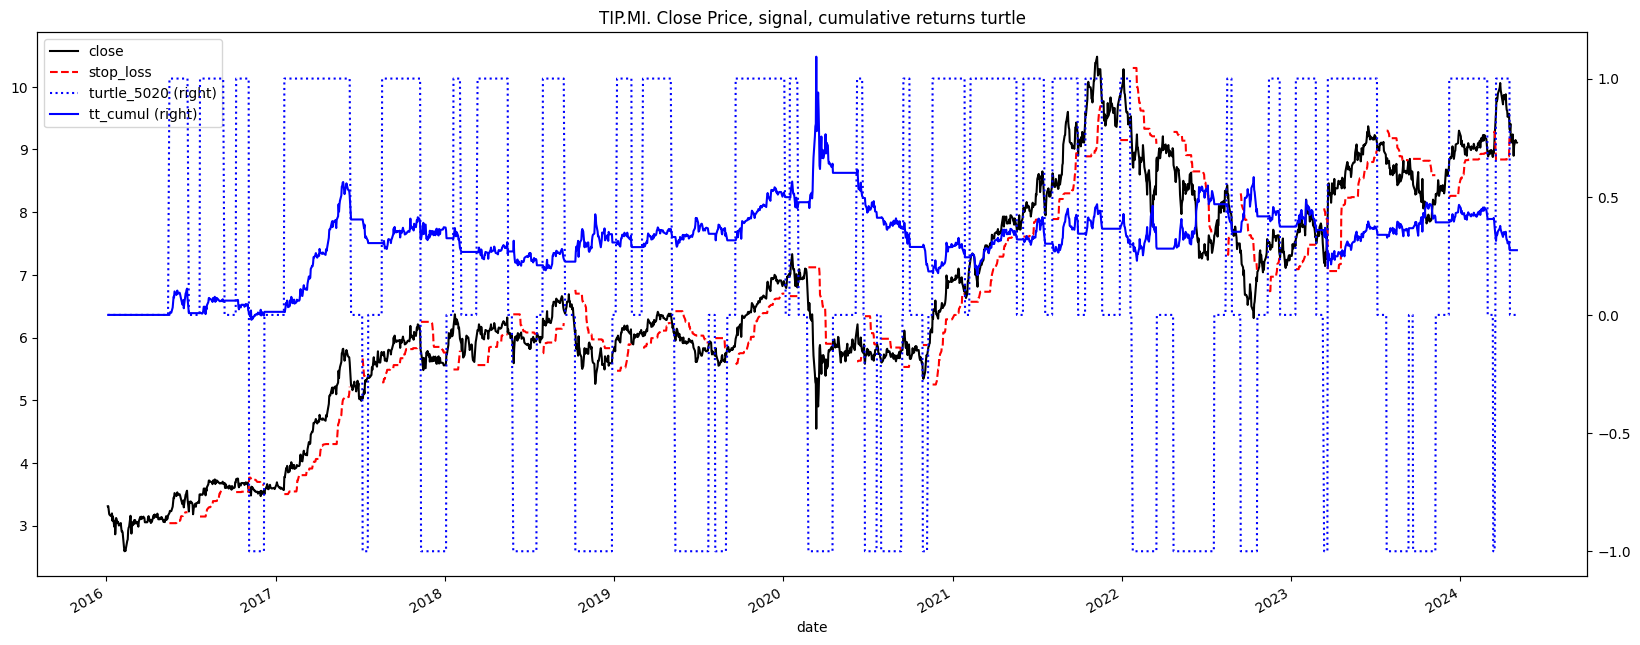

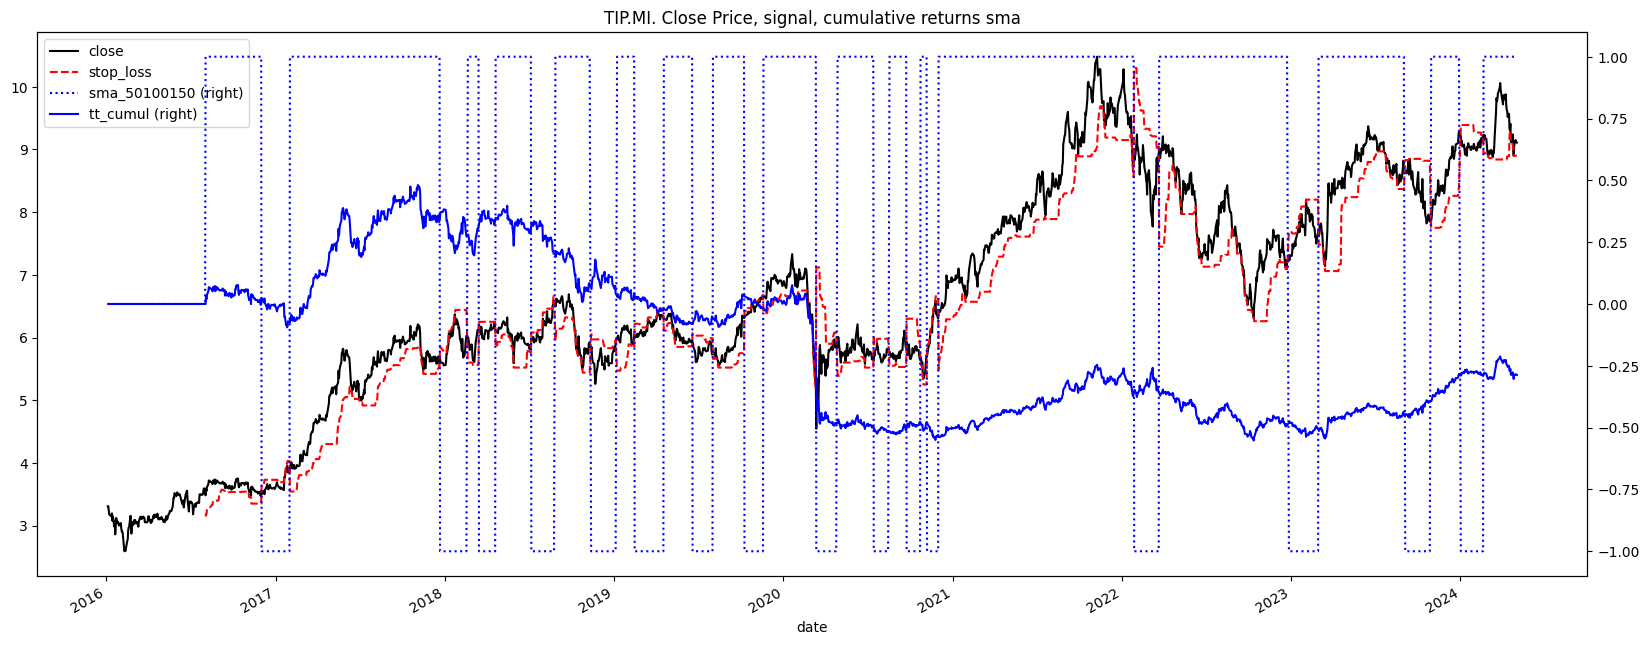

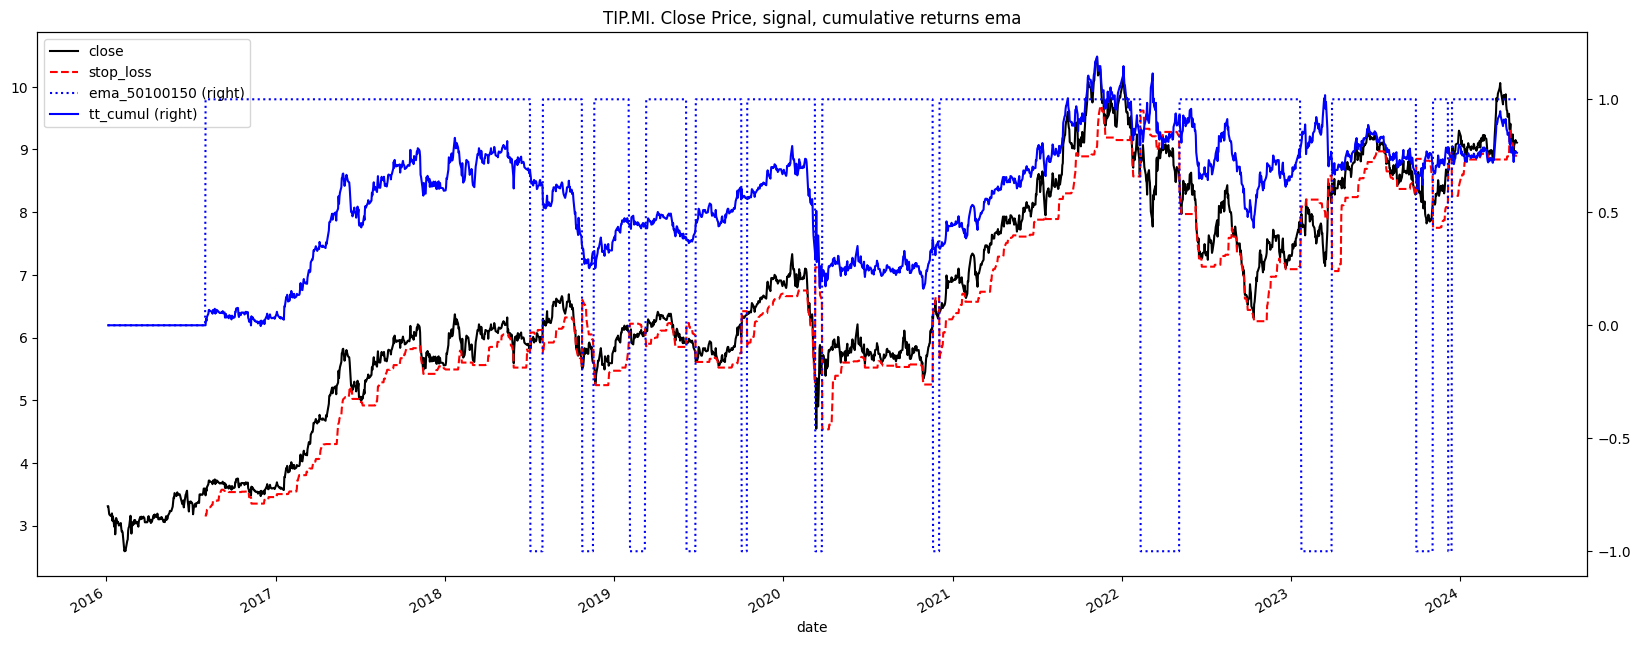

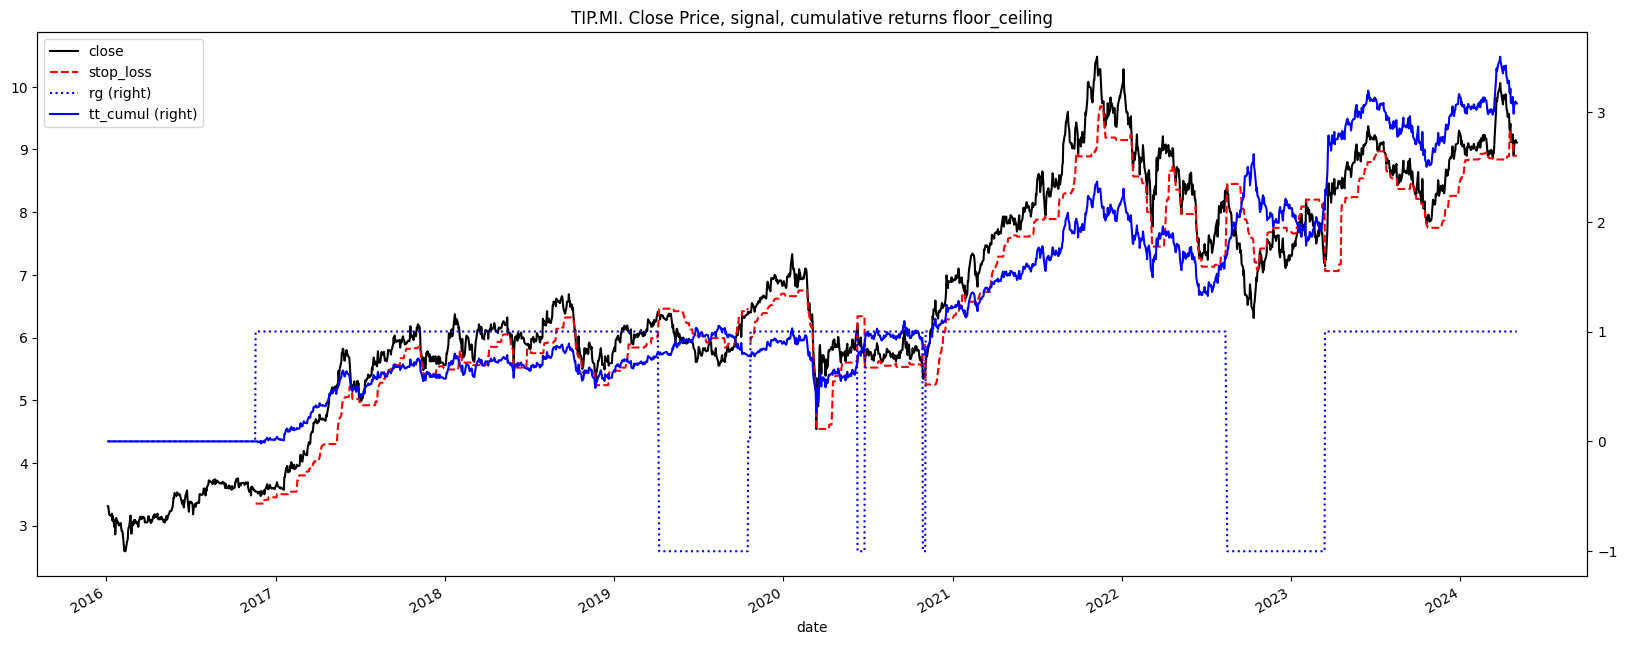

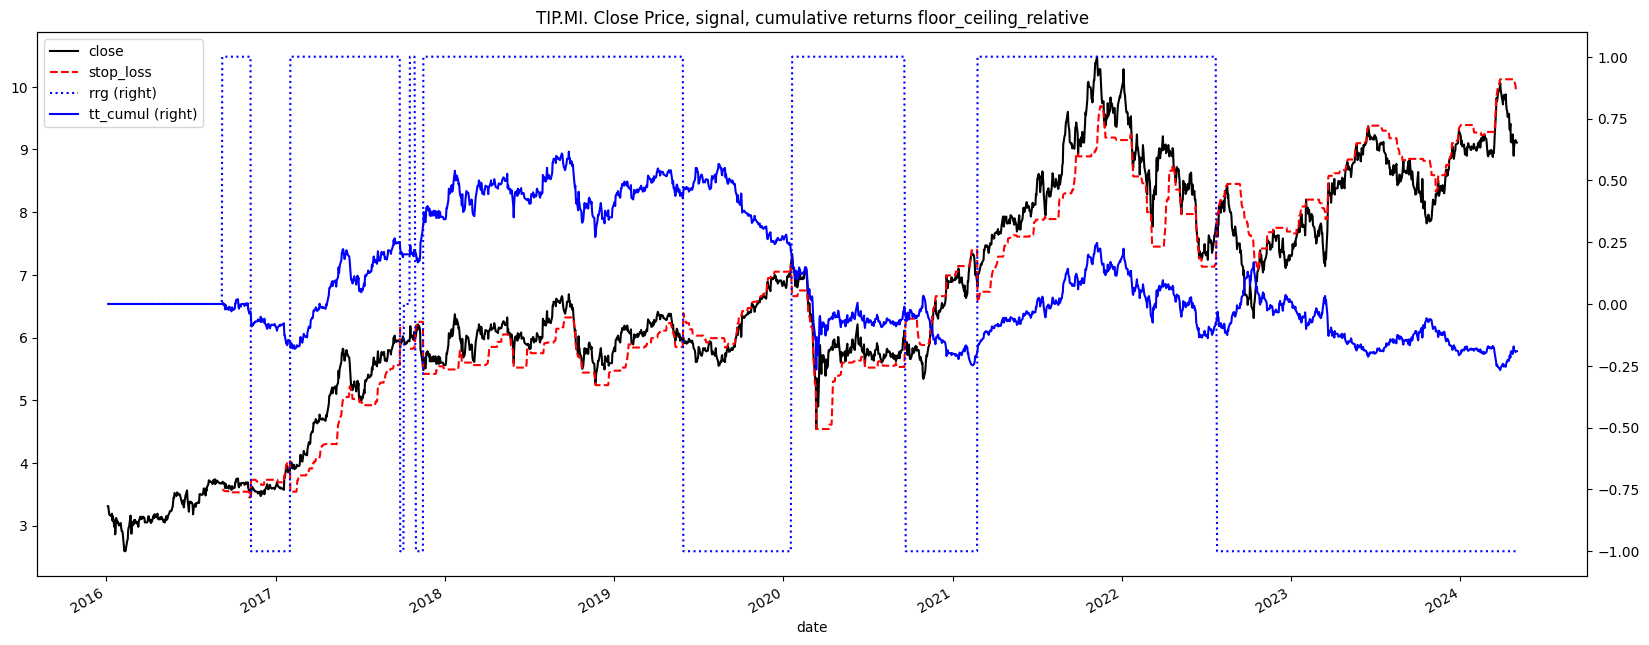

In [105]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

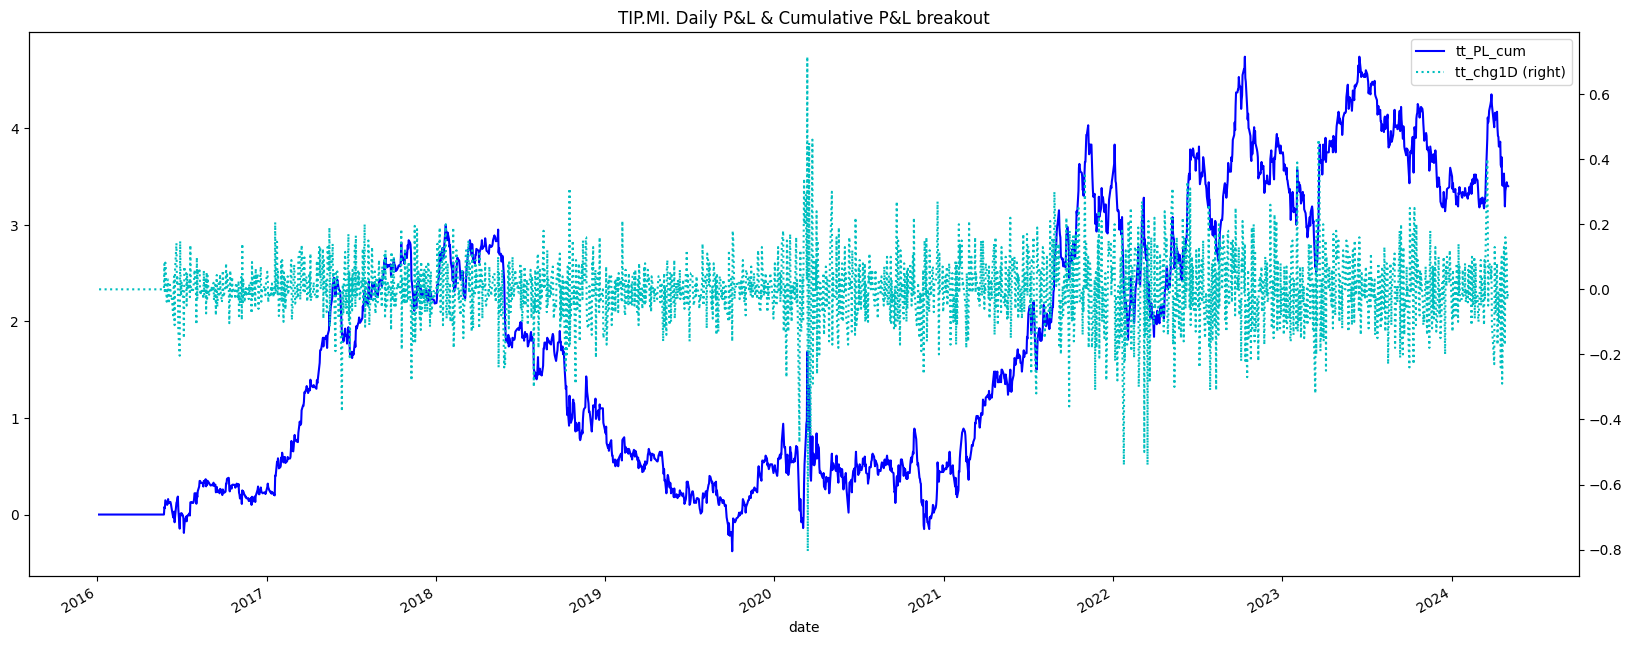

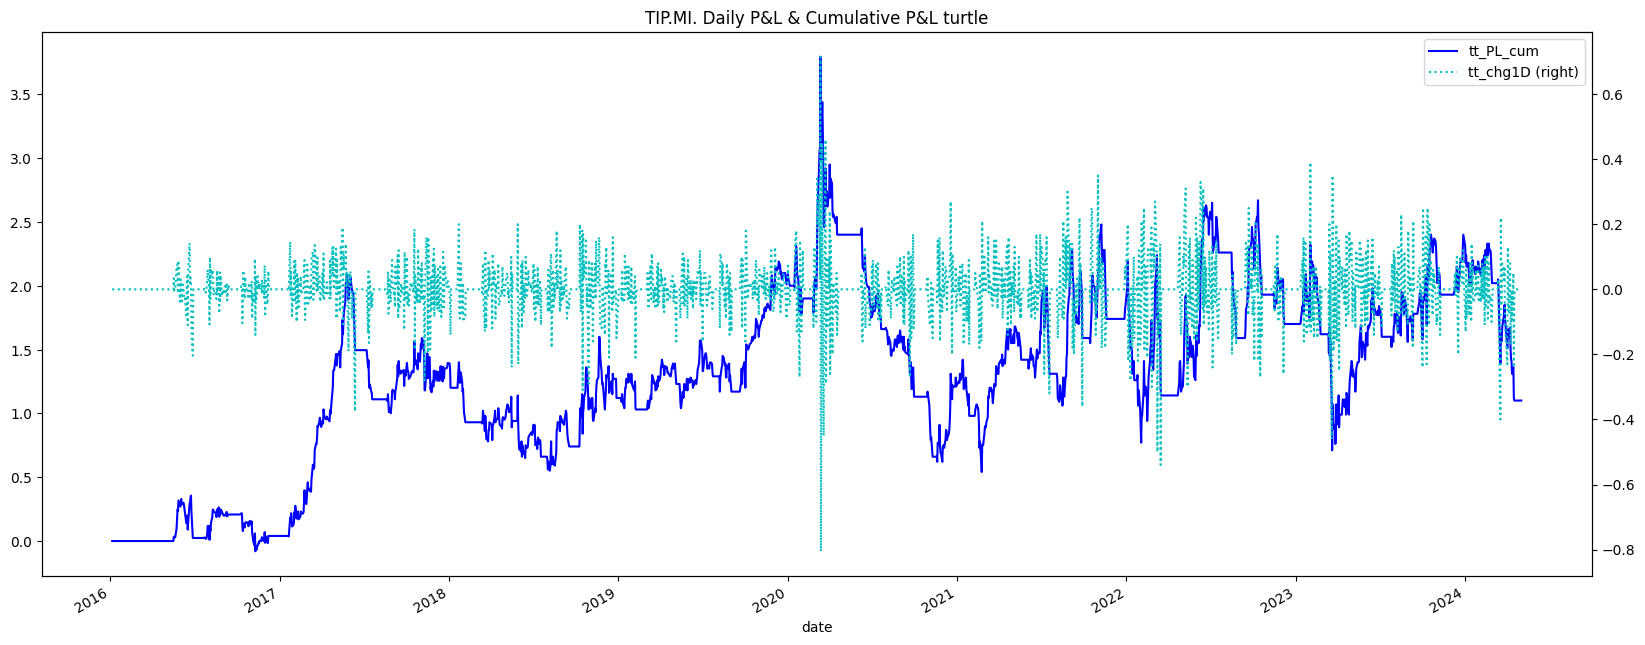

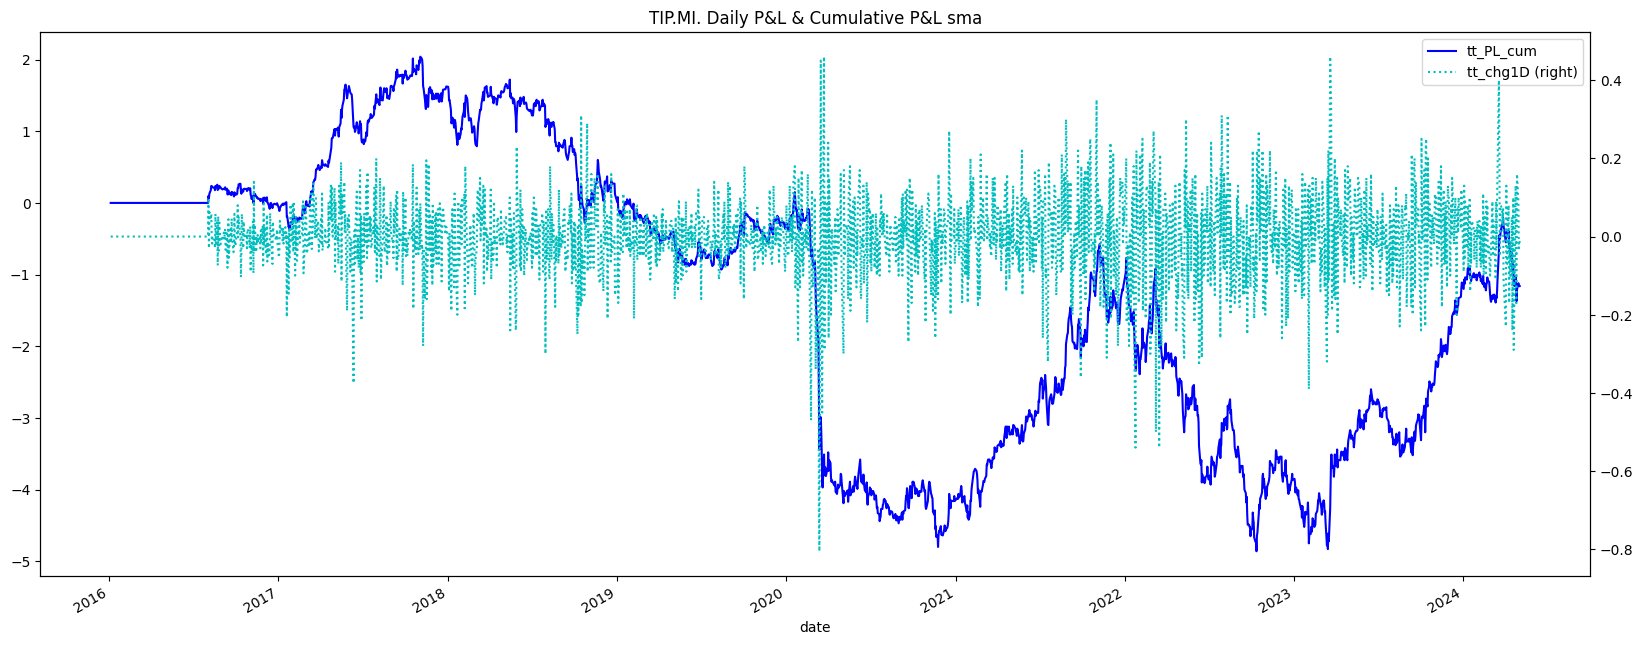

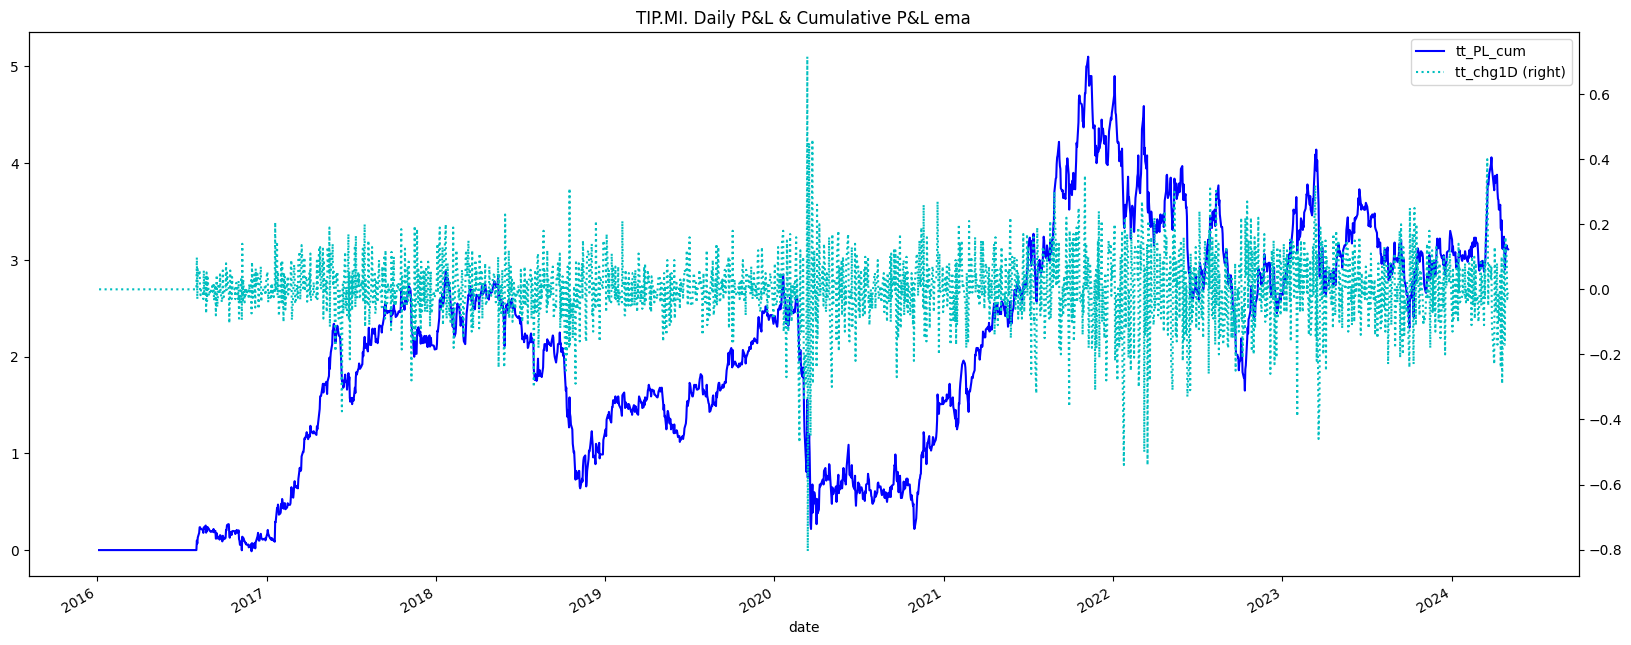

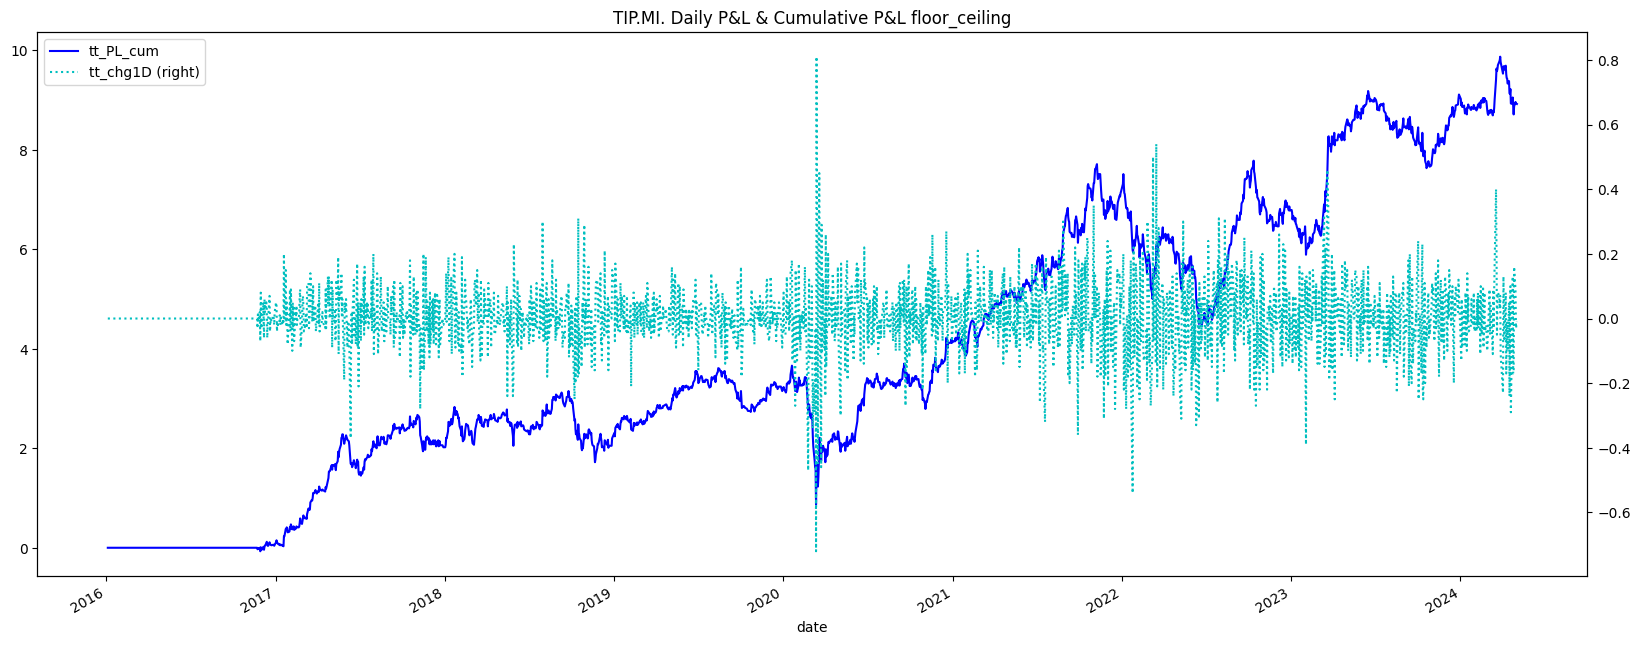

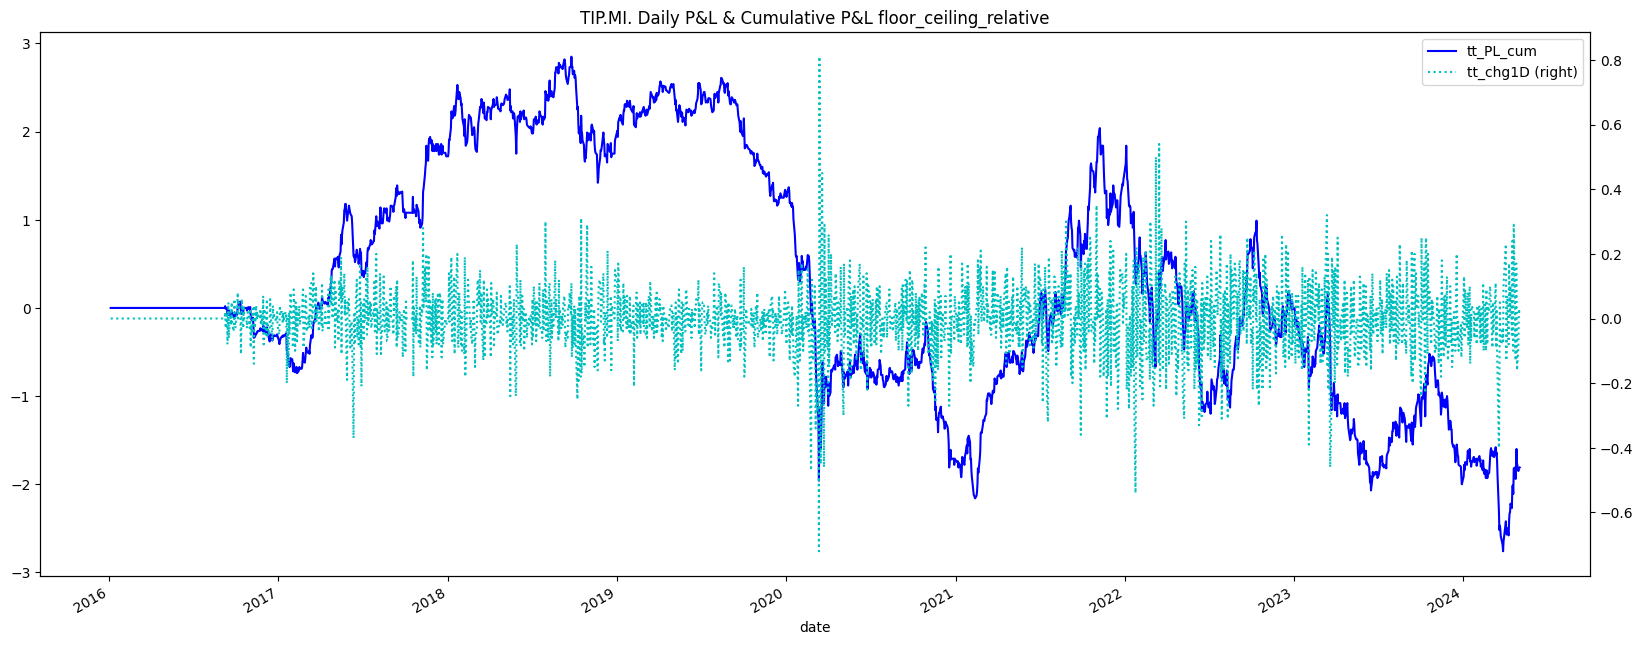

In [106]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [107]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.000003             -0.000006   0.154099
ema                        -0.000148             -0.000157  -8.463372
floor_ceiling               0.000409              0.000400  23.427256
floor_ceiling_relative     -0.000074             -0.000083  -4.253710
sma                         0.001072              0.001063  61.499190
turtle                      0.000139              0.000134  13.575275

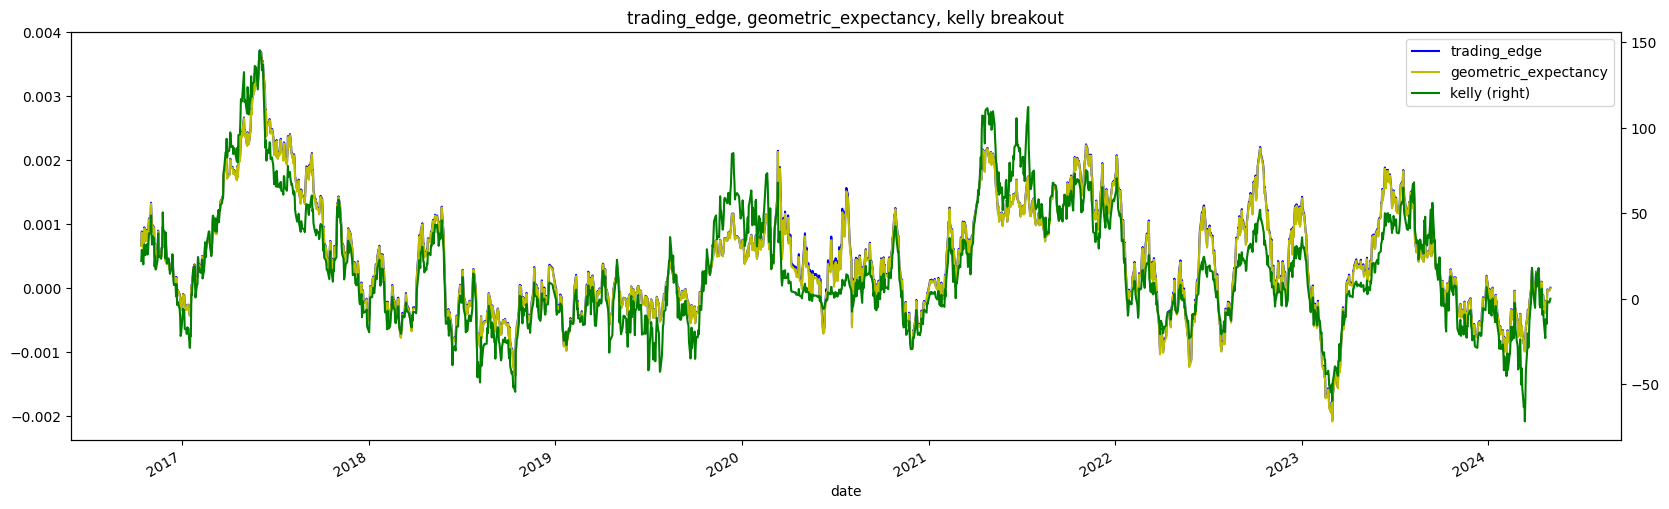

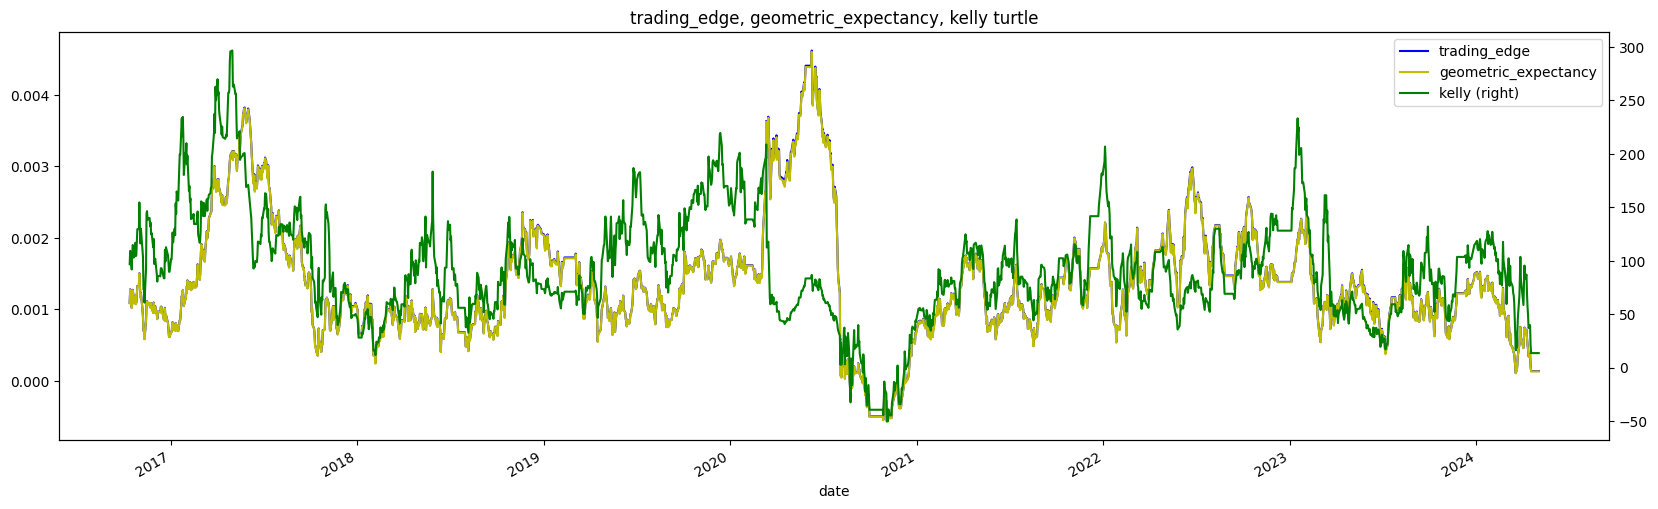

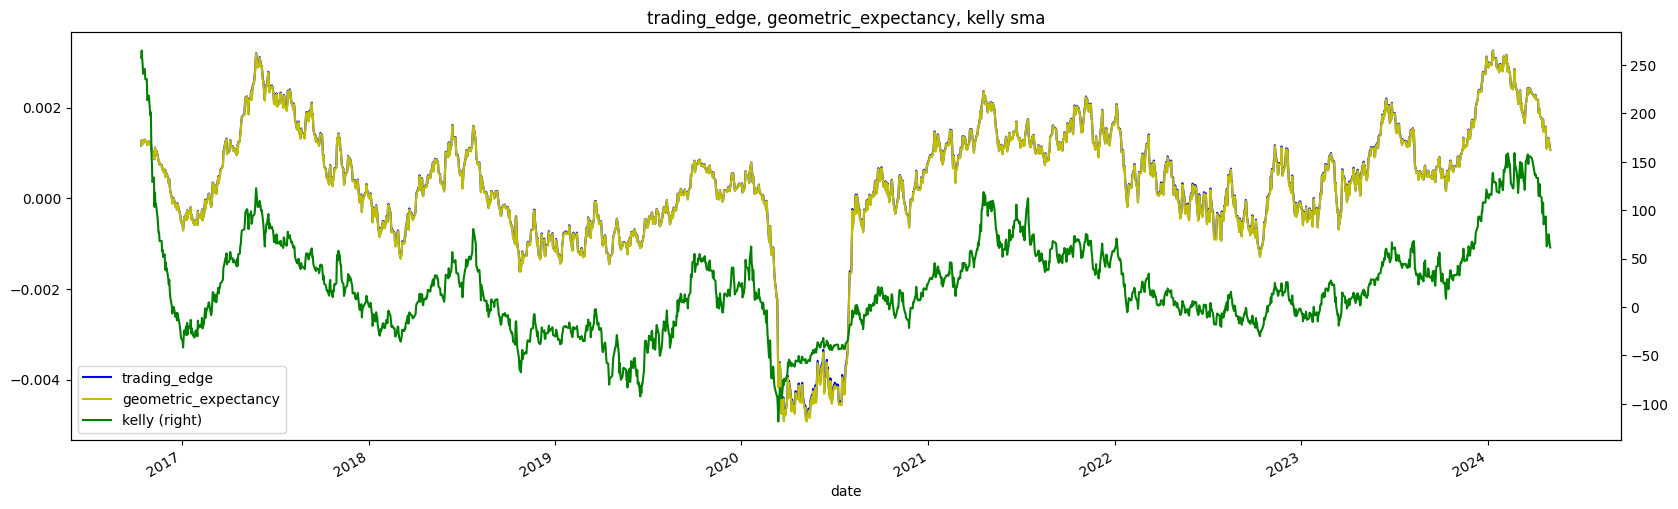

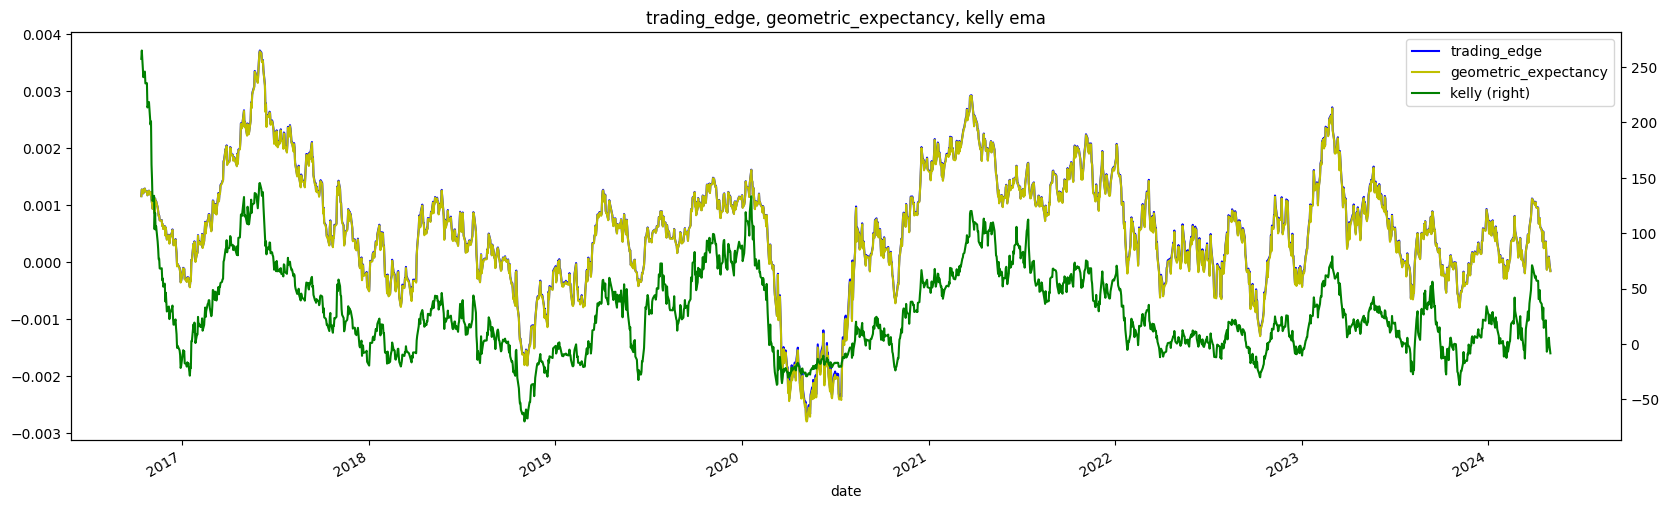

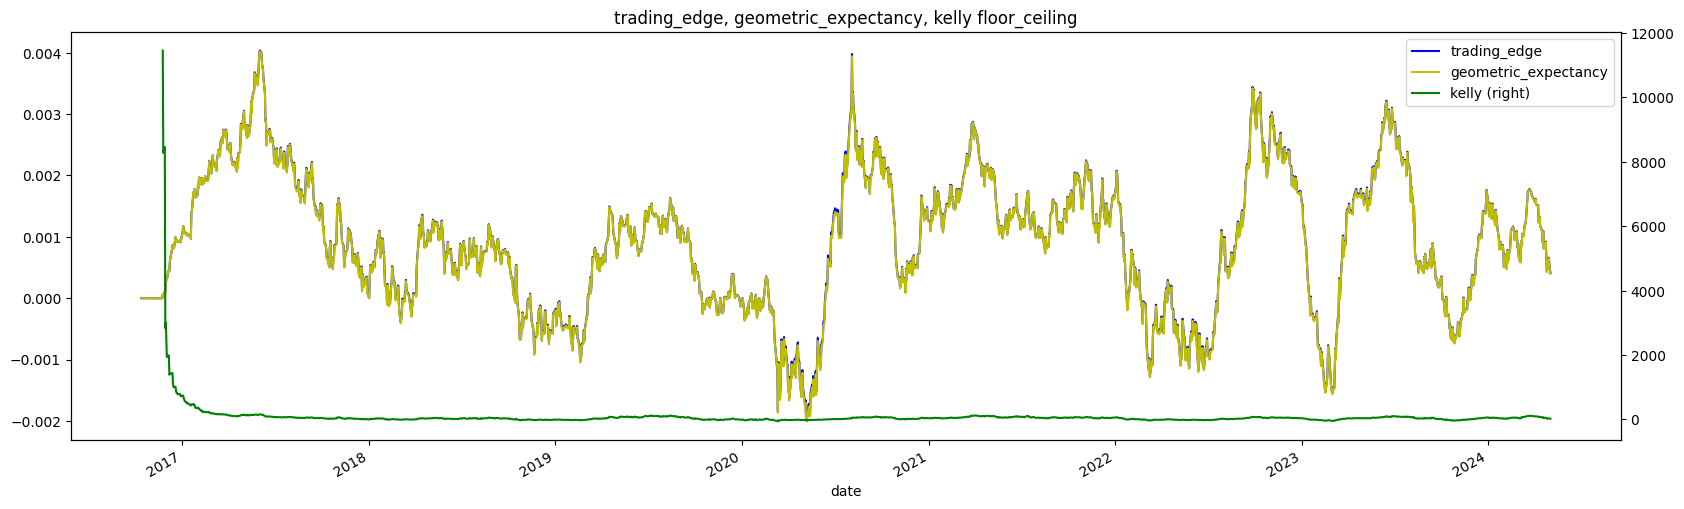

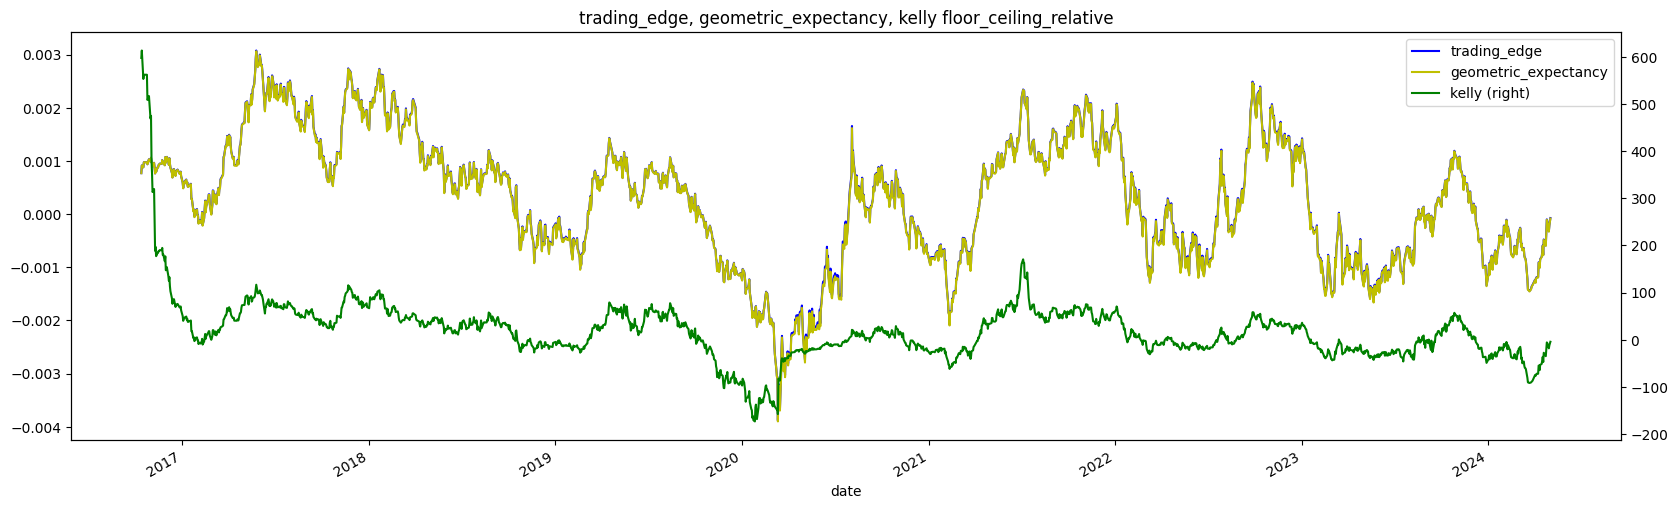

In [108]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [109]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [110]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [111]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [112]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant   concave    convex  equal_weight  \
method                                                               
breakout                105100.0  107480.0  107480.0      104760.0   
ema                     104351.2  106837.6  106837.6      104351.2   
floor_ceiling           113320.0  119980.0  116278.0      108786.0   
floor_ceiling_relative   96479.0   95206.0   98674.0       99092.0   
sma                      98376.0   97448.0   97448.0       98376.0   
turtle                  103928.7  105454.0  103837.4      101348.0   

                        tt_PL_cum_fx  
method                                
breakout                       3.400  
ema                            3.108  
floor_ceiling                  8.920  
floor_ceiling_relative        -1.810  
sma                           -1.160  
turtle                         1.101

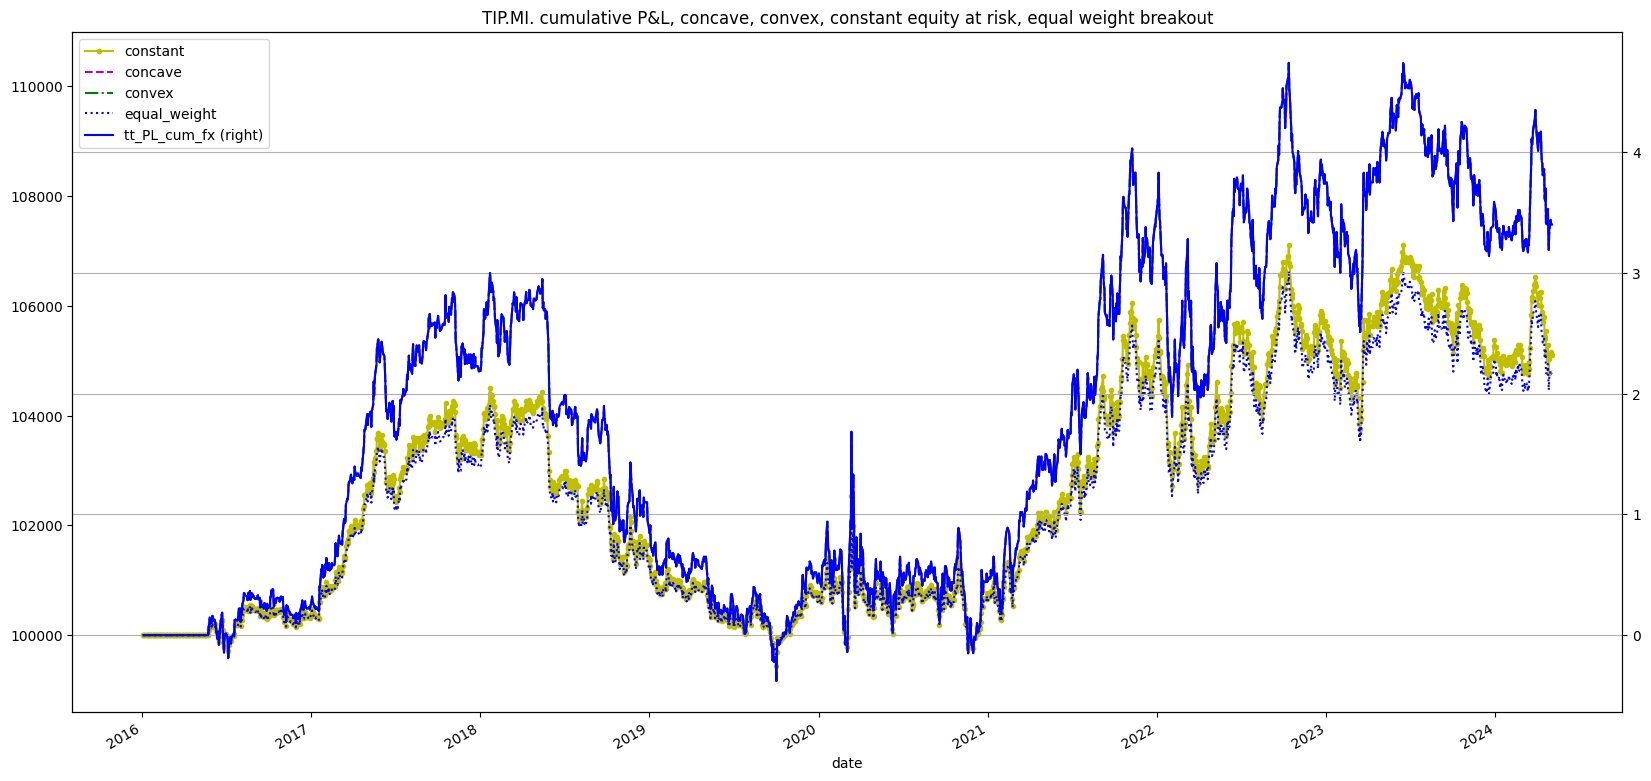

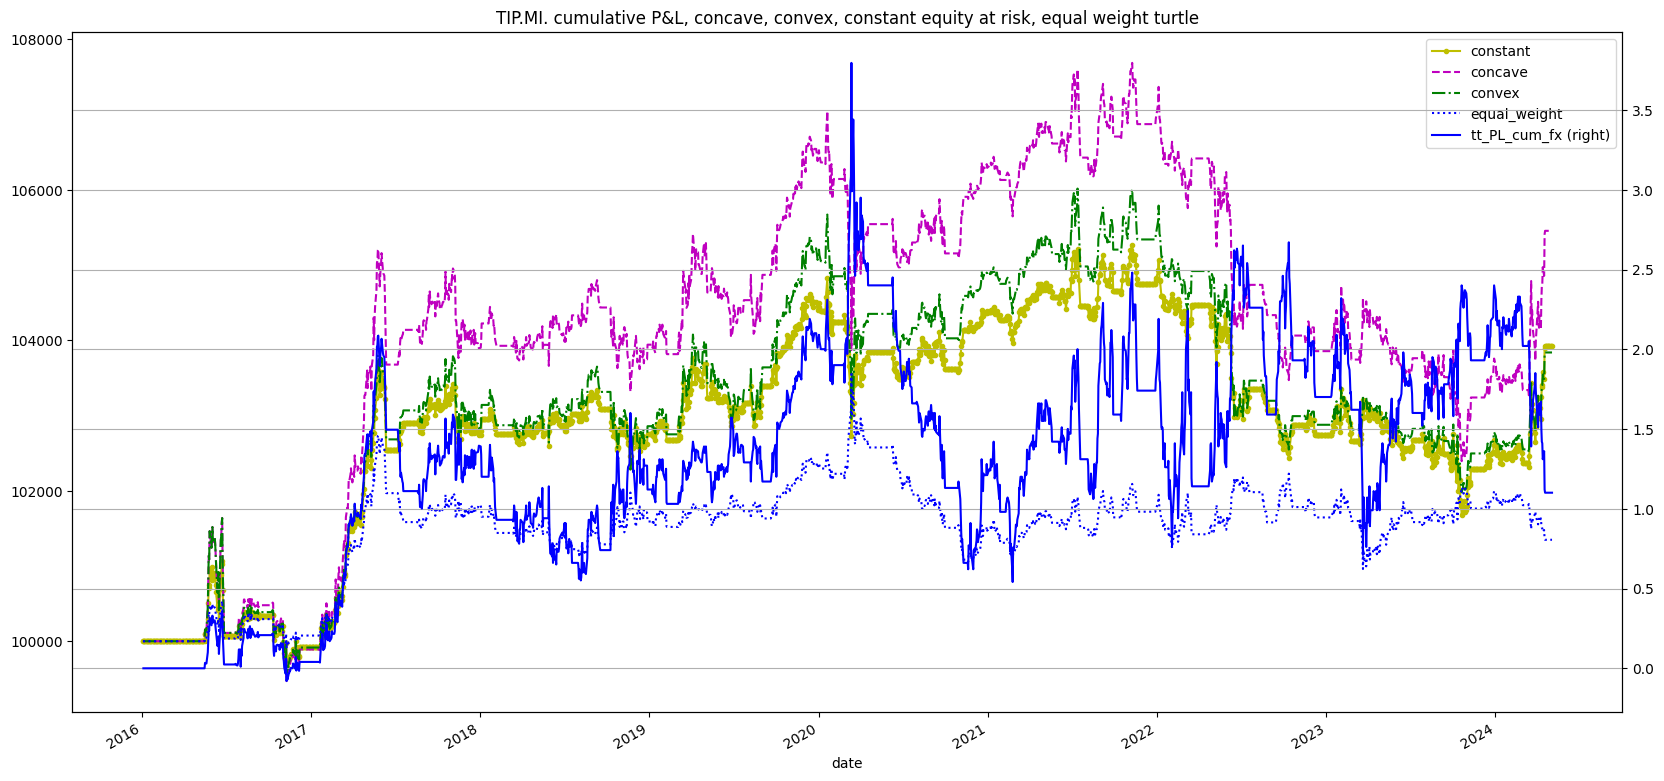

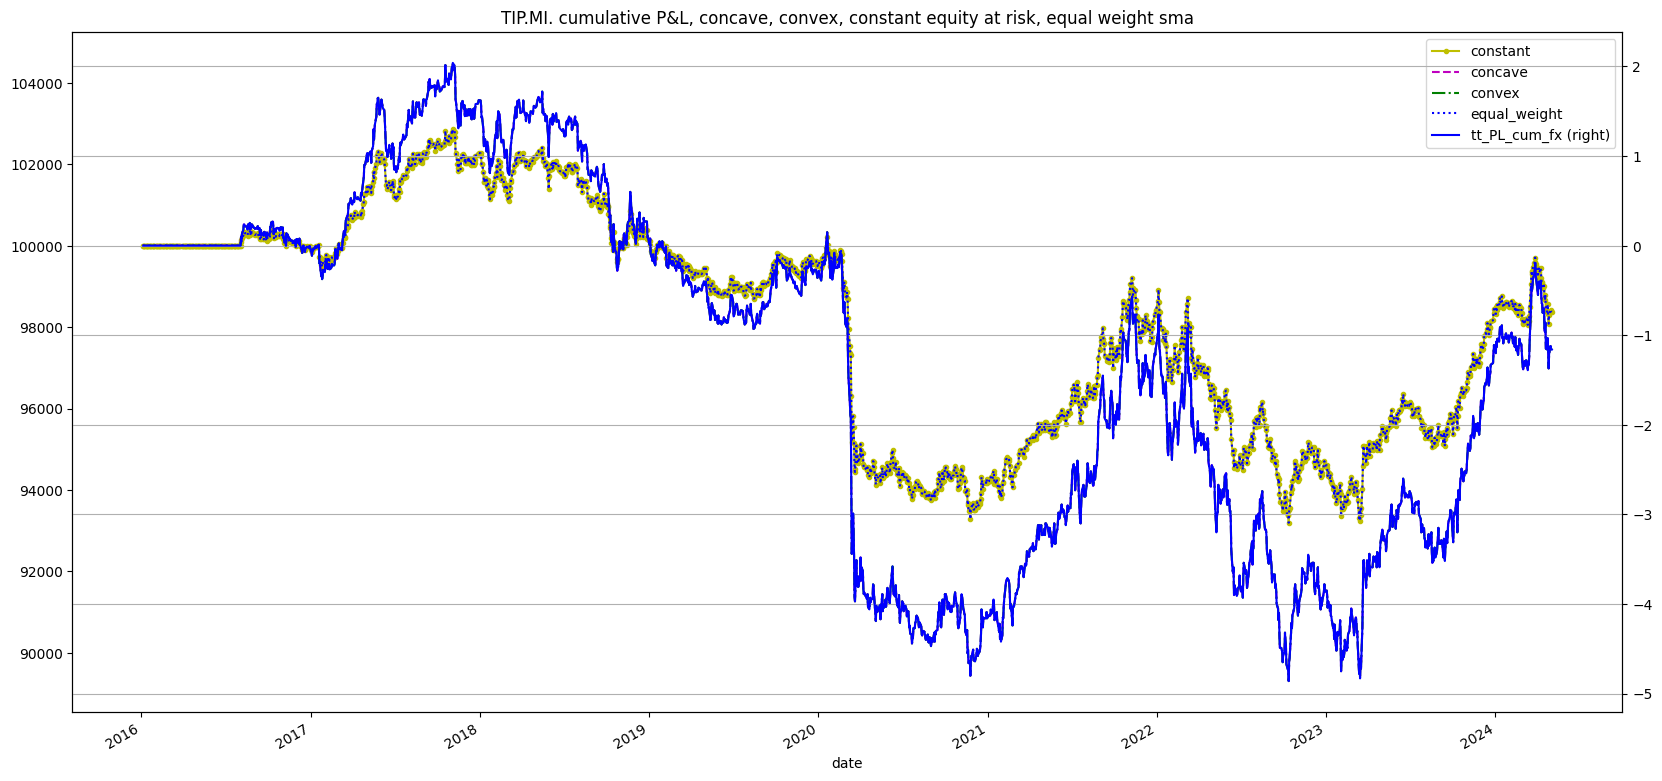

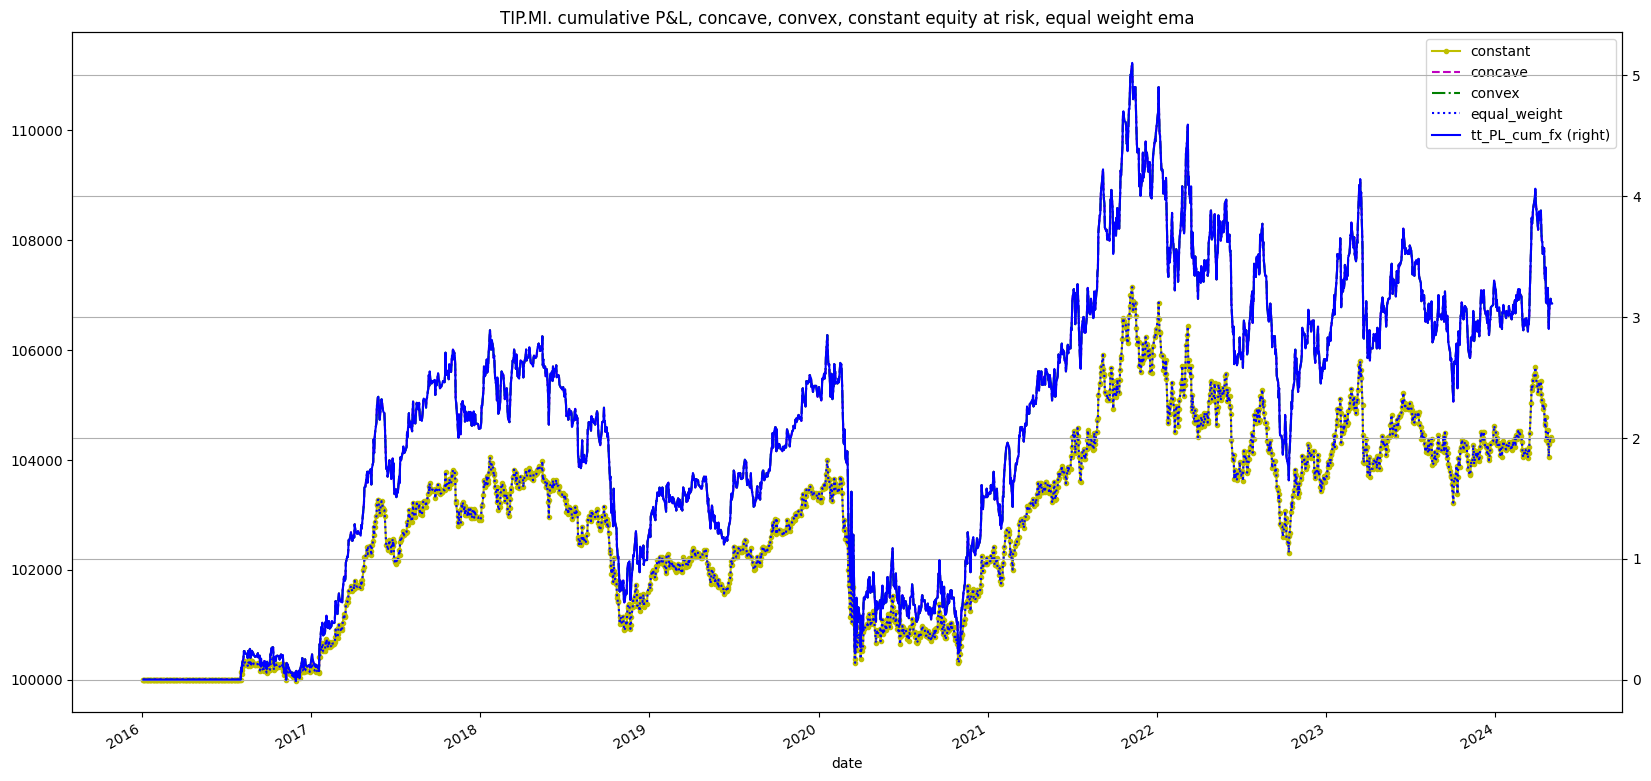

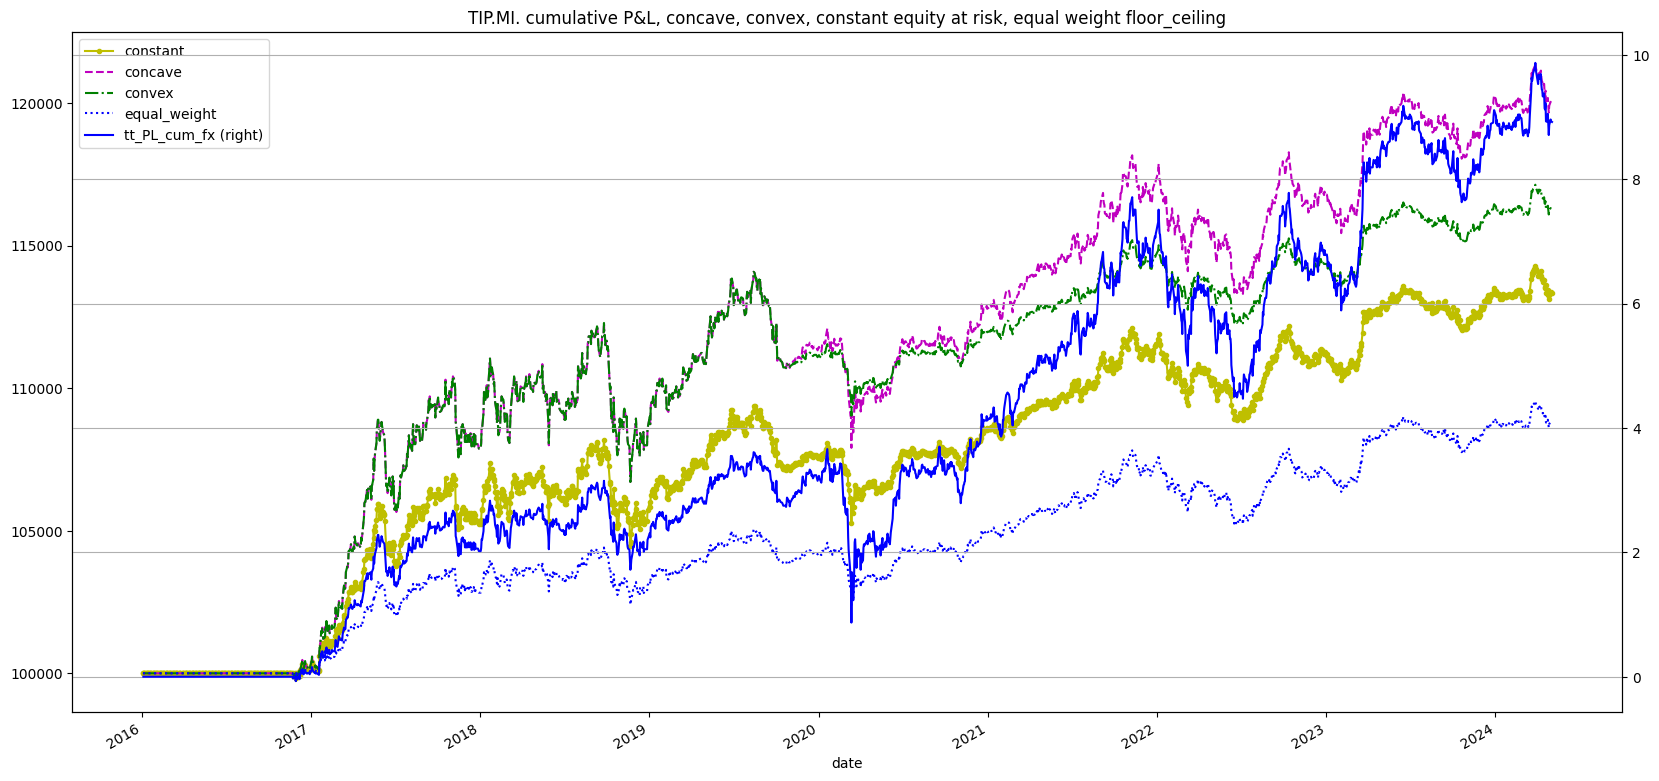

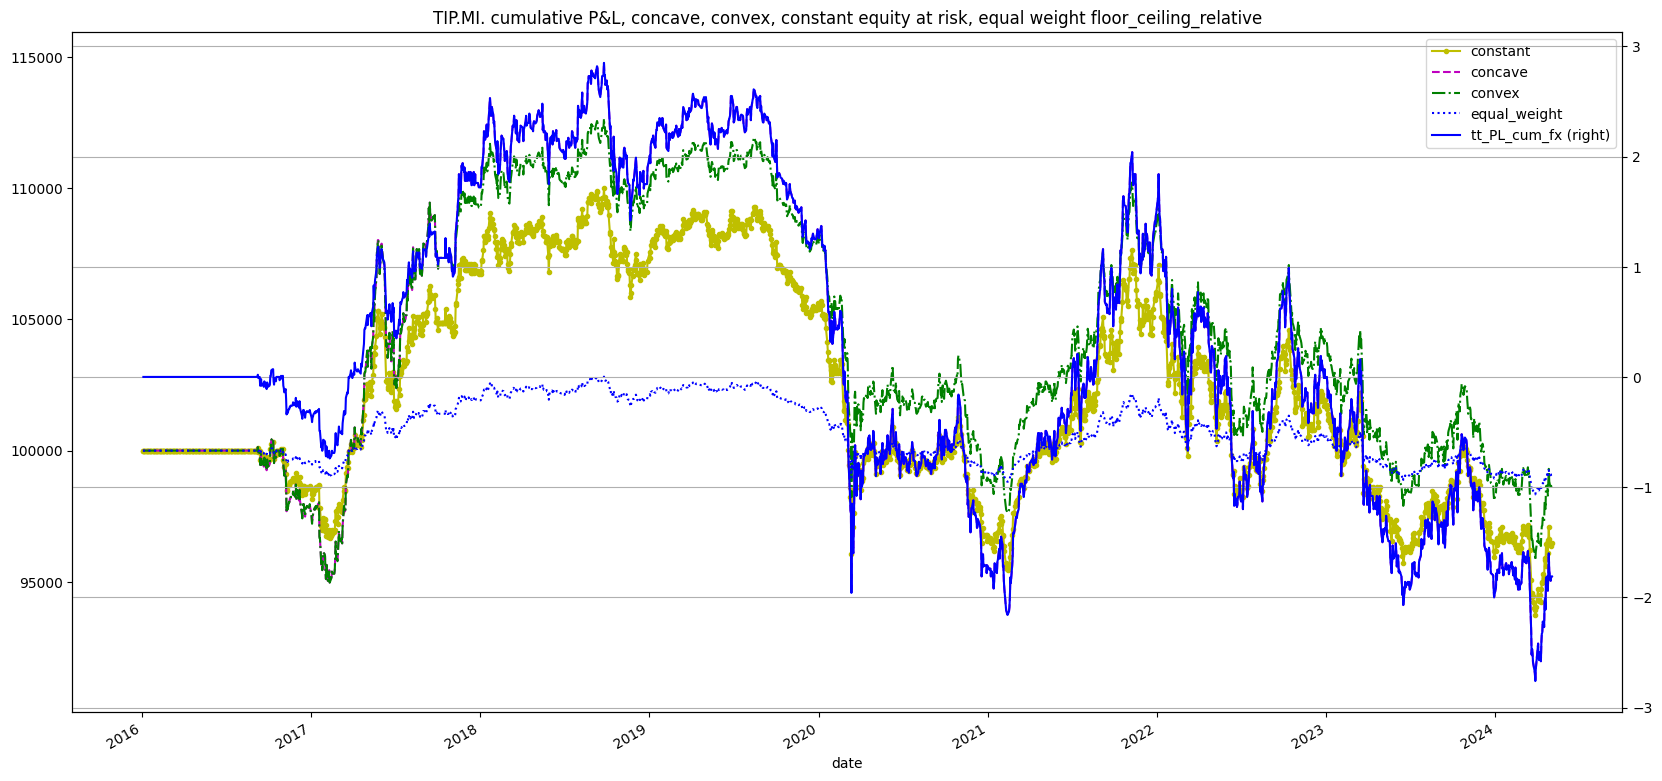

In [113]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [114]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -500.0   1500.0   2200.0   2200.0
ema                      -500.0   1400.0   2200.0   2200.0
floor_ceiling            -500.0   1000.0   1500.0    900.0
floor_ceiling_relative   -500.0   2900.0   4200.0   3000.0
sma                      -500.0   1400.0   2200.0   2200.0
turtle                   -500.0  -1700.0  -2300.0  -1400.0

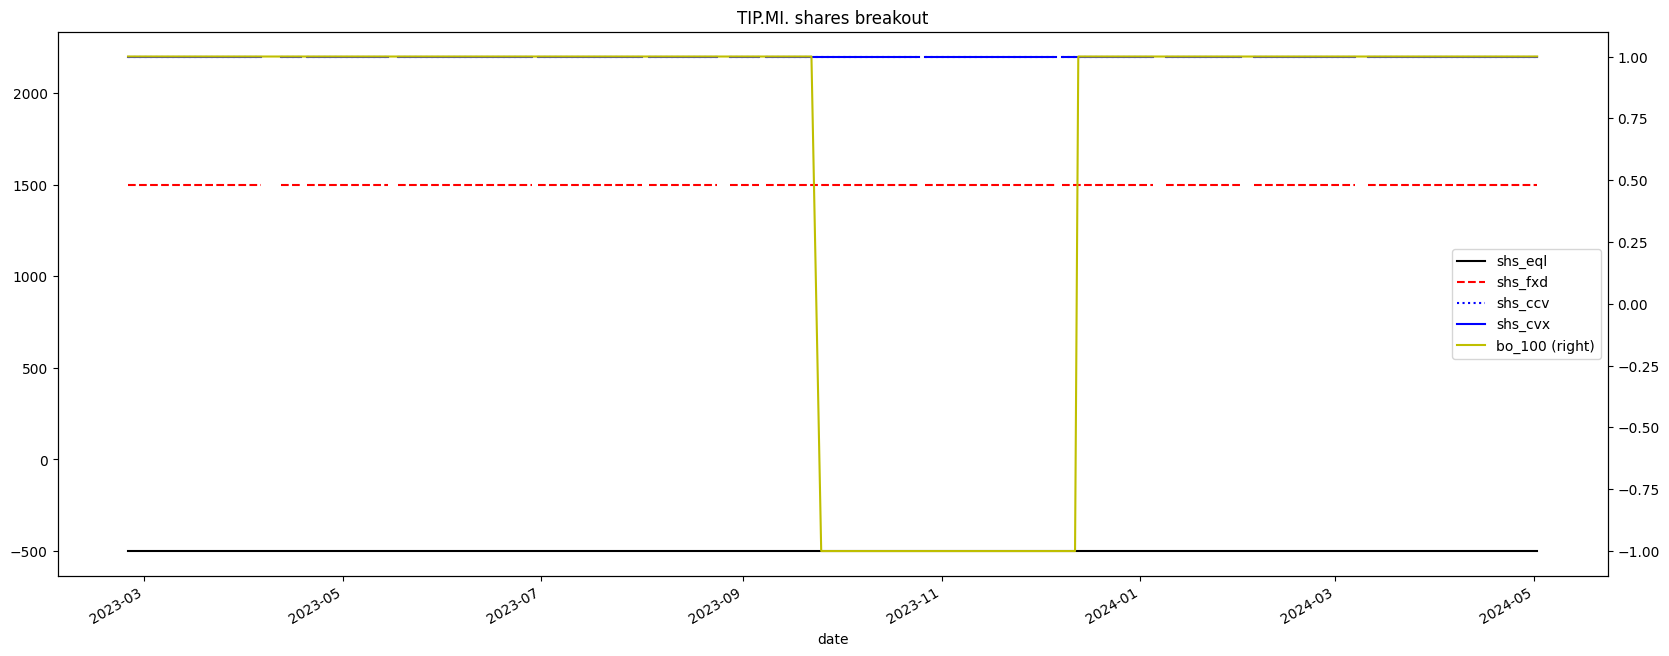

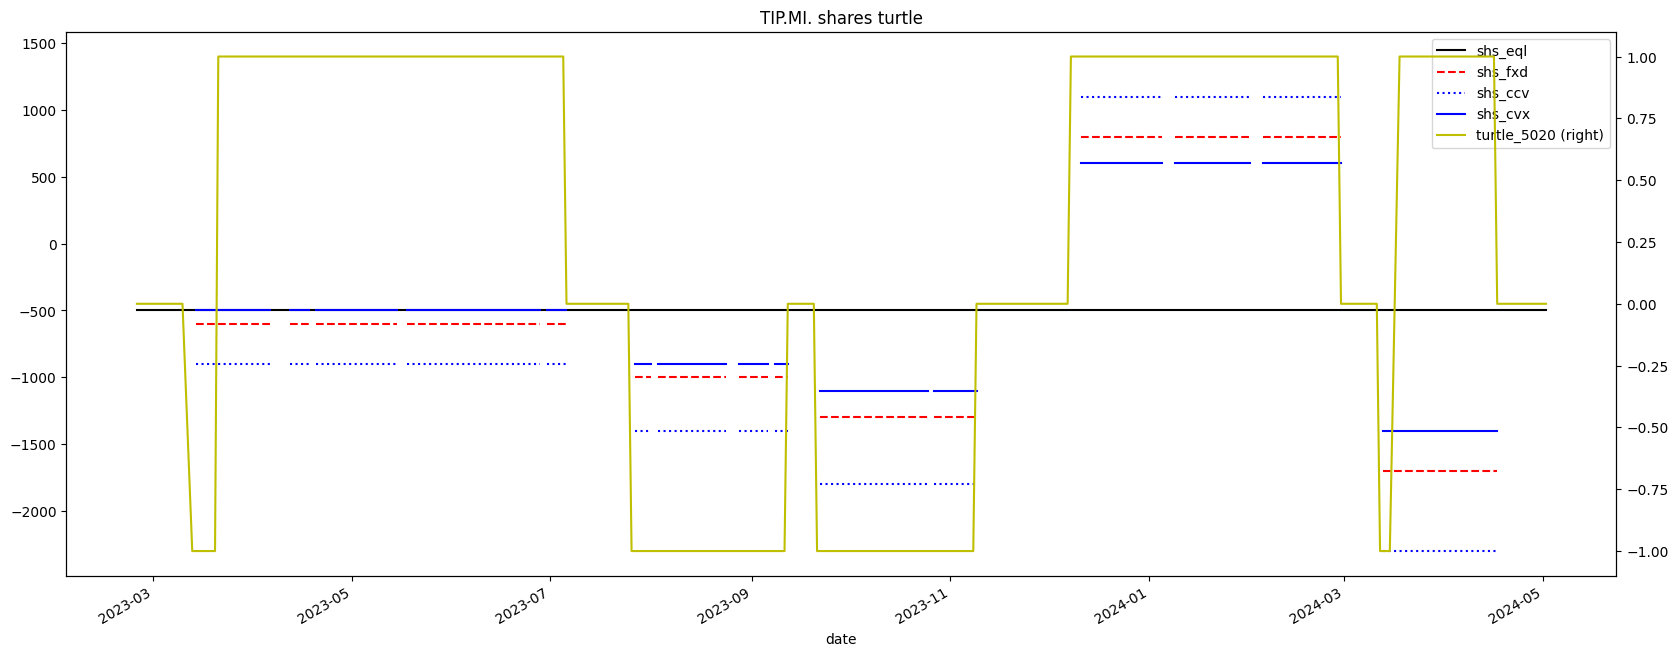

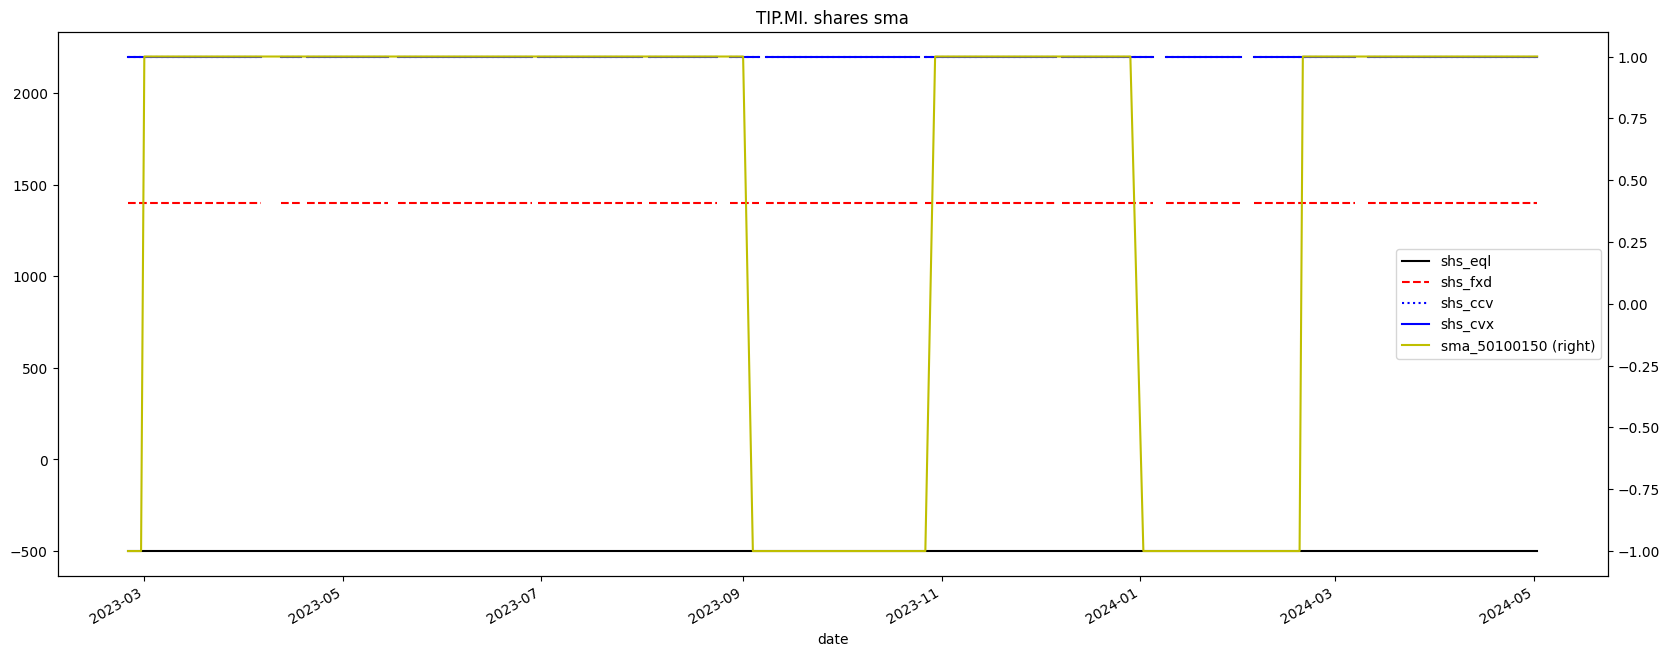

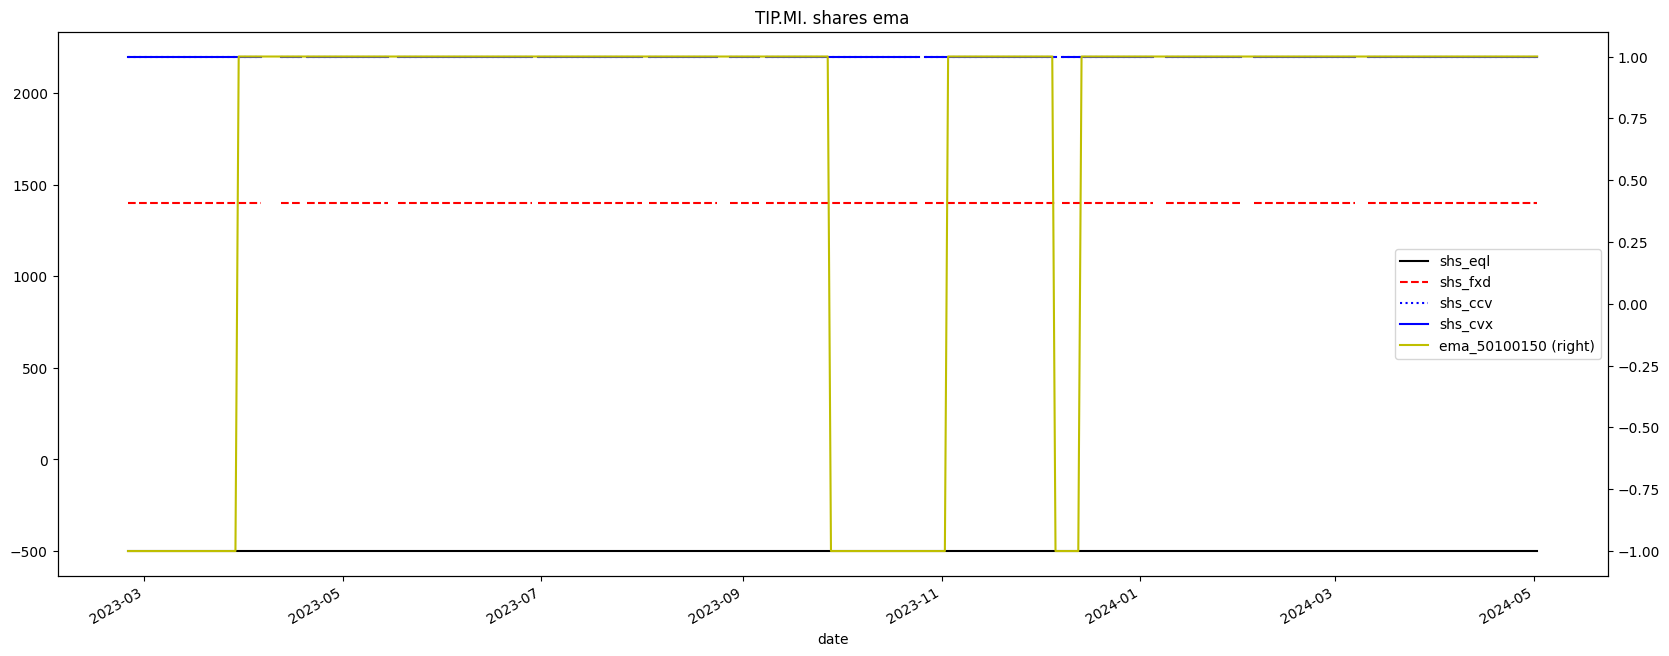

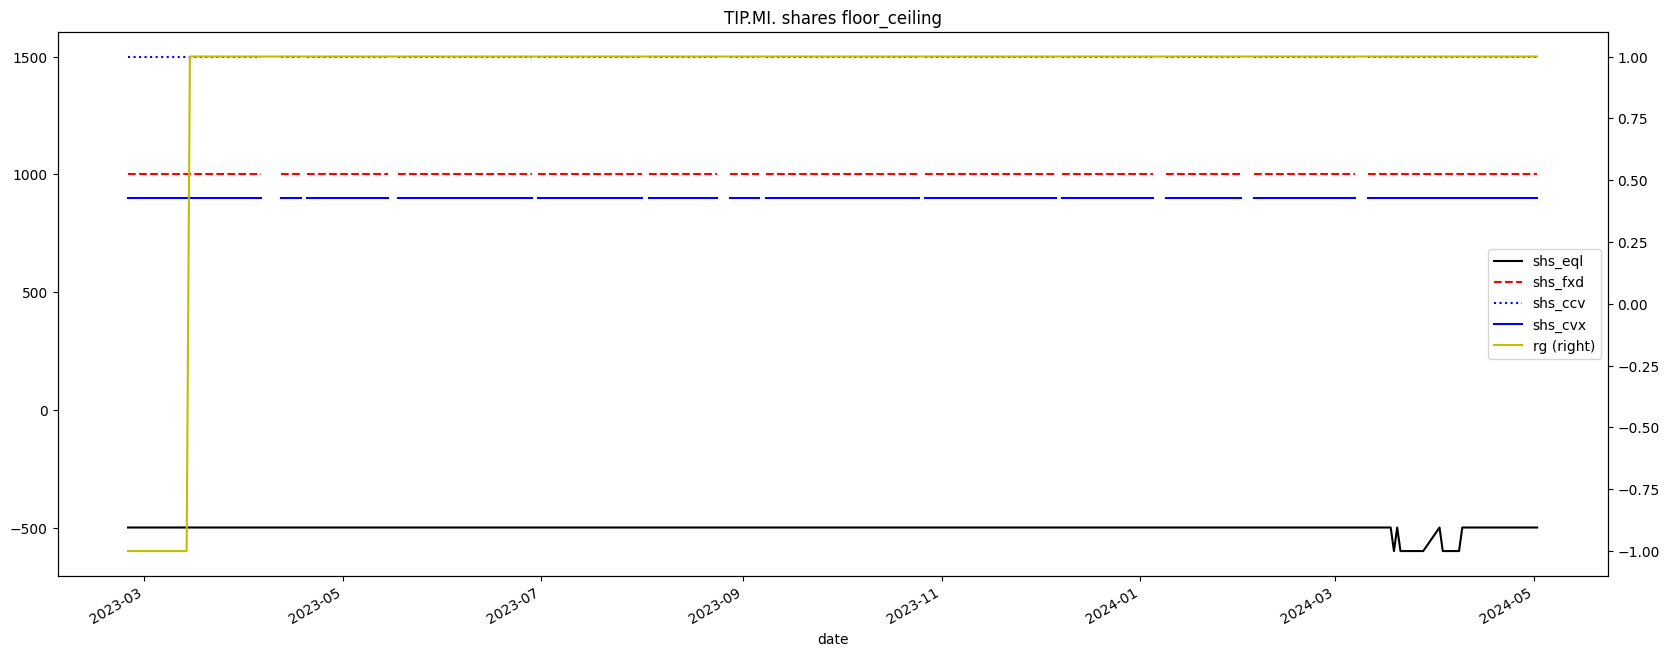

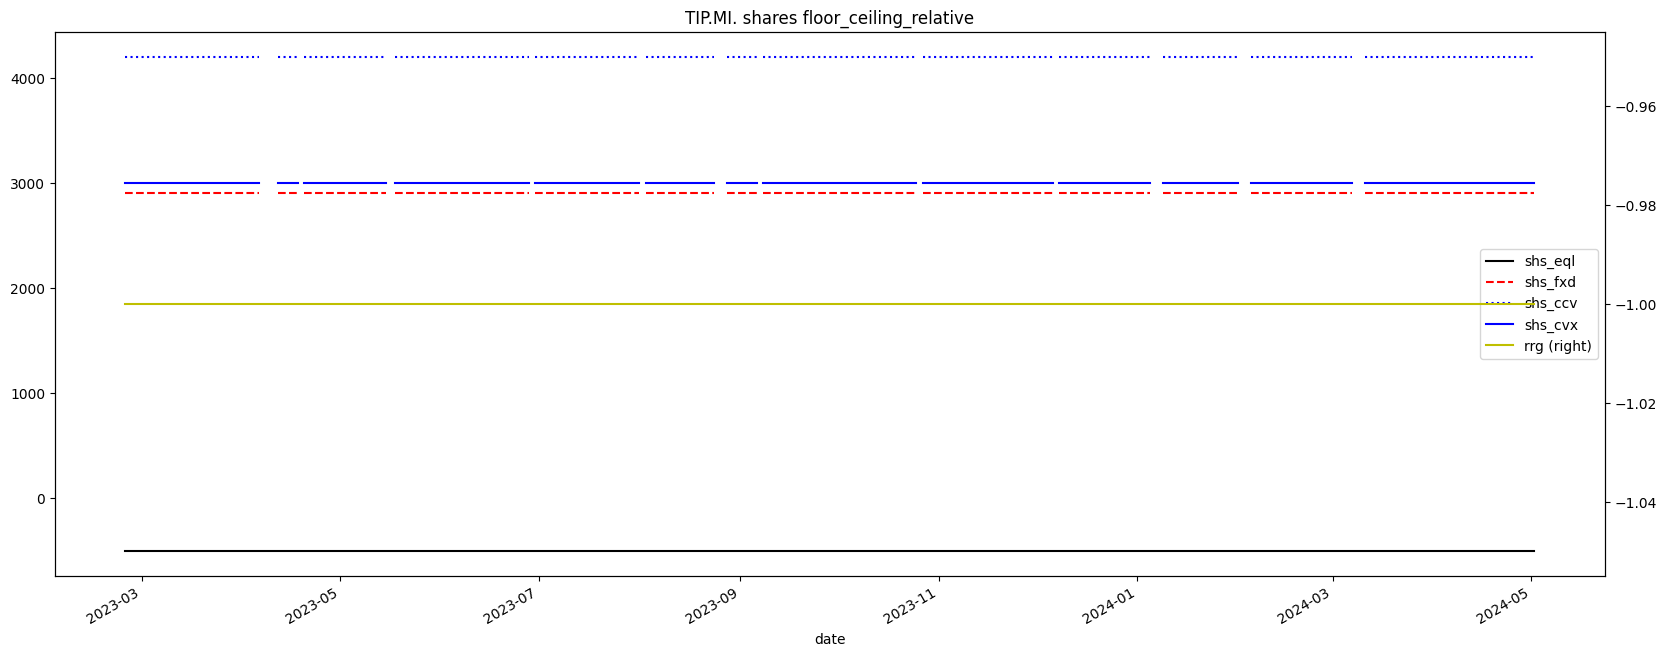

In [115]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])


In [117]:
df_fc
df_fc.dropna(subset=['hi3'])[['date', 'hi3', 'rh3']]

date    hi3  rh3
164  2016-08-24   3.76  NaN
354  2017-05-23   5.86  NaN
472  2017-11-06   6.25  NaN
525  2018-01-23   6.44  5.6
602  2018-05-15   6.37  NaN
696  2018-09-25   6.70  NaN
830  2019-04-08   6.41  NaN
1026 2020-01-20   7.34  NaN
1124 2020-06-09   6.34  NaN
1197 2020-09-18   6.30  NaN
1487 2021-11-08  10.54  NaN
1683 2022-08-16   8.45  NaN
1804 2023-02-02   8.20  NaN
1897 2023-06-16   9.38  NaN
2096 2024-03-27  10.12  NaN